In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [2]:
# Plot style – clean and publication‑ready
sns.set(style="whitegrid", palette="muted", rc={"figure.figsize": (10, 6)})
plt.rcParams["savefig.dpi"] = 150   # high‑res PNGs

# Reproducibility for any stochastic plot elements
np.random.seed(42)

In [3]:
# Directory for saving figures (created automatically)
FIG_DIR = Path("reports/figures")
FIG_DIR.mkdir(parents=True, exist_ok=True)


In [4]:
from pathlib import Path

PROJECT_ROOT = Path.cwd().parent
DATA_DIR = PROJECT_ROOT / "data"

INTERIM_PATH = DATA_DIR / "interim" / "cleaned.csv"
PROCESSED_X = DATA_DIR / "processed" / "X_train.parquet"
PROCESSED_Y = DATA_DIR / "processed" / "y_train.parquet"


In [5]:
from pathlib import Path
import pandas as pd

# ------------------------------------------------------------------
# Project paths (robust for notebooks/)
# ------------------------------------------------------------------
PROJECT_ROOT = Path.cwd().parent
DATA_DIR = PROJECT_ROOT / "data"

PROCESSED_X = DATA_DIR / "processed" / "X_train.parquet"
PROCESSED_Y = DATA_DIR / "processed" / "y_train.parquet"
INTERIM_PATH = DATA_DIR / "interim" / "cleaned.csv"

# ------------------------------------------------------------------
# Load training data (SAFE + CORRECT)
# ------------------------------------------------------------------
if PROCESSED_X.exists() and PROCESSED_Y.exists():
    X = pd.read_parquet(PROCESSED_X)
    y = pd.read_parquet(PROCESSED_Y)

    # Index-safe merge (never use .values)
    df = X.join(y)

    source = "processed X_train + y_train parquet"

else:
    raise FileNotFoundError(
        "Processed training data not found. "
        "Expected X_train.parquet and y_train.parquet."
    )

# ------------------------------------------------------------------
# Sanity checks (fail fast if something is wrong)
# ------------------------------------------------------------------
assert len(df) == len(X) == len(y), "Row count mismatch after join"
assert df.index.equals(y.index), "Index misalignment between X and y"
assert "Churn" in df.columns, "Target column missing"

print(f"Data loaded from: {source}")
print(df.shape)
df.head()


Data loaded from: processed X_train + y_train parquet
(5634, 33)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,is_two_year_contract,has_internet_service,is_senior,num_active_services,pay_electronic_check,pay_mailed_check,pay_bank_transfer_automatic,pay_credit_card_automatic,billing_lag,Churn
0,Male,No,No,No,35,No,No phone service,DSL,No,No,...,0,1,0,3,1,0,0,0,-20.35,0
1,Male,No,Yes,Yes,15,Yes,No,Fiber optic,Yes,No,...,0,1,0,2,0,1,0,0,25.05,0
2,Male,No,Yes,Yes,13,No,No phone service,DSL,Yes,Yes,...,1,1,0,3,0,1,0,0,63.20,0
3,Female,No,Yes,No,26,Yes,No,DSL,No,Yes,...,1,1,0,5,0,0,0,1,-5.30,0
4,Male,No,Yes,Yes,1,Yes,No,DSL,No,No,...,0,1,0,1,1,0,0,0,0.00,0


In [6]:
print(f"Data loaded from: {source}")
print(f"Shape: {df.shape}")
df.head()
# %%
# Quick sanity checks
print("\n--- Data types & memory usage ---")
print(df.info())
print("\n--- Basic statistics (numeric) ---")
display(df.describe())
print("\n--- Basic statistics (categorical) ---")
display(df.describe(include=["category", "object"]))
# %%
# Missing‑value audit
missing_counts = df.isnull().sum()
missing_percent = (missing_counts / len(df) * 100).round(2)
missing_df = pd.DataFrame(
    {"missing_count": missing_counts, "missing_%": missing_percent}
).query("missing_count > 0")
if missing_df.empty:
    print("✅ No missing values detected.")
else:
    display(missing_df)

Data loaded from: processed X_train + y_train parquet
Shape: (5634, 33)

--- Data types & memory usage ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   gender                       5634 non-null   category
 1   SeniorCitizen                5634 non-null   category
 2   Partner                      5634 non-null   category
 3   Dependents                   5634 non-null   category
 4   tenure                       5634 non-null   int64   
 5   PhoneService                 5634 non-null   category
 6   MultipleLines                5634 non-null   category
 7   InternetService              5634 non-null   category
 8   OnlineSecurity               5634 non-null   category
 9   OnlineBackup                 5634 non-null   category
 10  DeviceProtection             5634 non-null   category
 11  TechSupport   

,tenure,MonthlyCharges,TotalCharges,avg_monthly_charge,is_monthly_contract,is_one_year_contract,is_two_year_contract,has_internet_service,is_senior,num_active_services,pay_electronic_check,pay_mailed_check,pay_bank_transfer_automatic,pay_credit_card_automatic,billing_lag,Churn
count,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000
mean,32.485091,64.929961,2299.334682,64.938144,0.550586,0.208200,0.241214,0.784523,0.163294,3.383032,0.335641,0.228257,0.220802,0.215300,0.038037,0.265353
std,24.568744,30.138105,2279.204278,30.224872,0.497479,0.406057,0.427858,0.411190,0.369667,2.071139,0.472256,0.419746,0.414824,0.411067,67.446688,0.441560
min,0.000000,18.400000,0.000000,13.828571,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-370.850000,0.000000
25%,9.000000,35.662500,402.975000,36.045516,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-28.687500,0.000000
50%,29.000000,70.500000,1394.925000,70.588666,1.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,90.000000,3835.825000,90.464446,1.000000,0.000000,0.000000,1.000000,0.000000,5.000000,1.000000,0.000000,0.000000,0.000000,28.800000,1.000000
max,72.000000,118.750000,8684.800000,121.400000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,1.000000,373.250000,1.000000



--- Basic statistics (categorical) ---


,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,tenure_group
count,5634,5634,5634,5634,5634,5634,5634,5634,5634,5634,5634,5634,5634,5634,5634,5634,5634
unique,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,4
top,Male,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,49+
freq,2833,4714,2905,4333,5075,2685,2483,2797,2442,2472,2771,2226,2217,3102,3331,1891,1840


✅ No missing values detected.


In [7]:
churn_counts = df["Churn"].value_counts().rename({0: "No", 1: "Yes"})
churn_perc = churn_counts / churn_counts.sum() * 100

/tmp/ipykernel_1751/4250793275.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_counts.index, y=churn_counts.values, palette="deep", ax=ax)


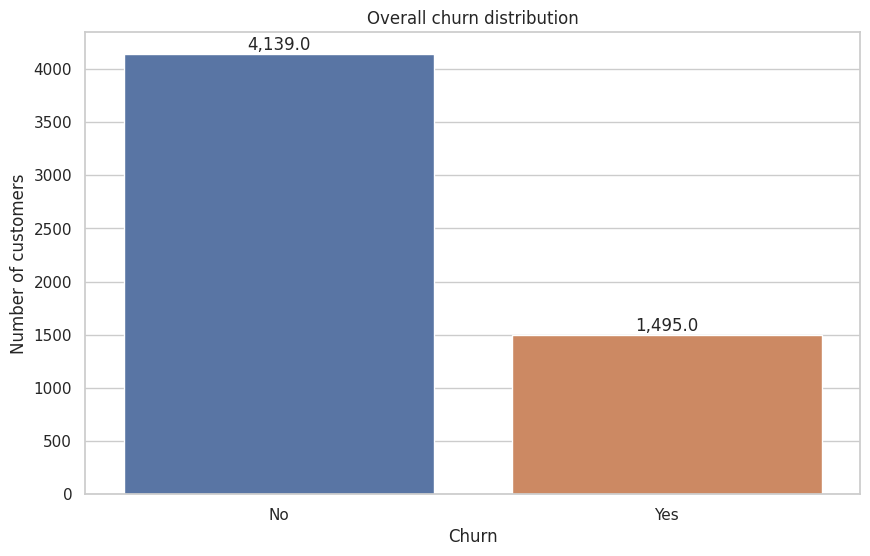

Churn rate = 26.54% (1,495 of 5,634 customers)


/tmp/ipykernel_1751/4250793275.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Churn rate = {churn_perc[1]:.2f}% ({churn_counts[1]:,} of {len(df):,} customers)")


In [8]:
fig, ax = plt.subplots()
sns.barplot(x=churn_counts.index, y=churn_counts.values, palette="deep", ax=ax)
ax.set_xlabel("Churn")
ax.set_ylabel("Number of customers")
ax.set_title("Overall churn distribution")
for p in ax.patches:
    ax.annotate(f"{p.get_height():,}", (p.get_x() + p.get_width() / 2, p.get_height()),
                ha="center", va="bottom")
plt.savefig(FIG_DIR / "churn_distribution.png")
plt.show()

print(f"Churn rate = {churn_perc[1]:.2f}% ({churn_counts[1]:,} of {len(df):,} customers)")


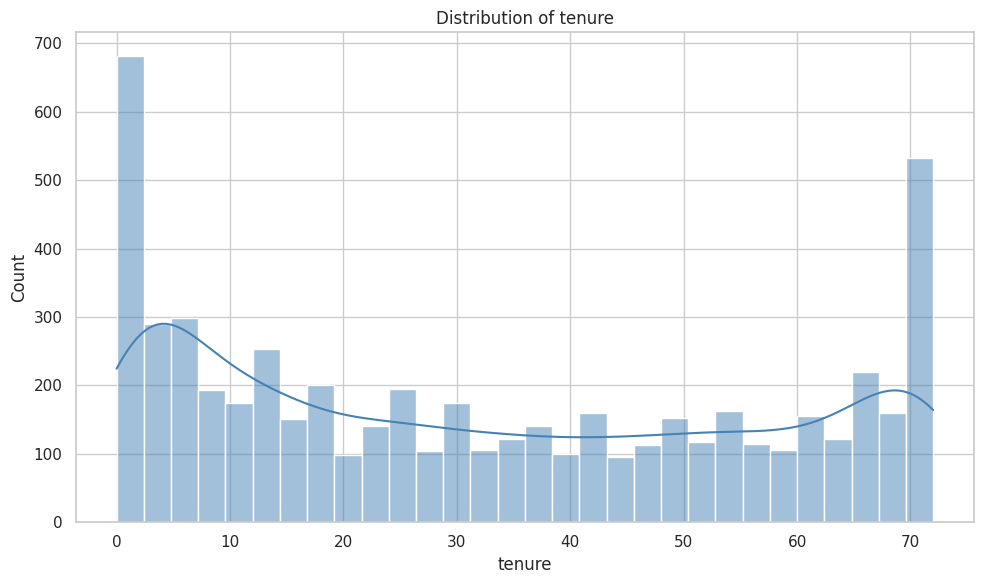

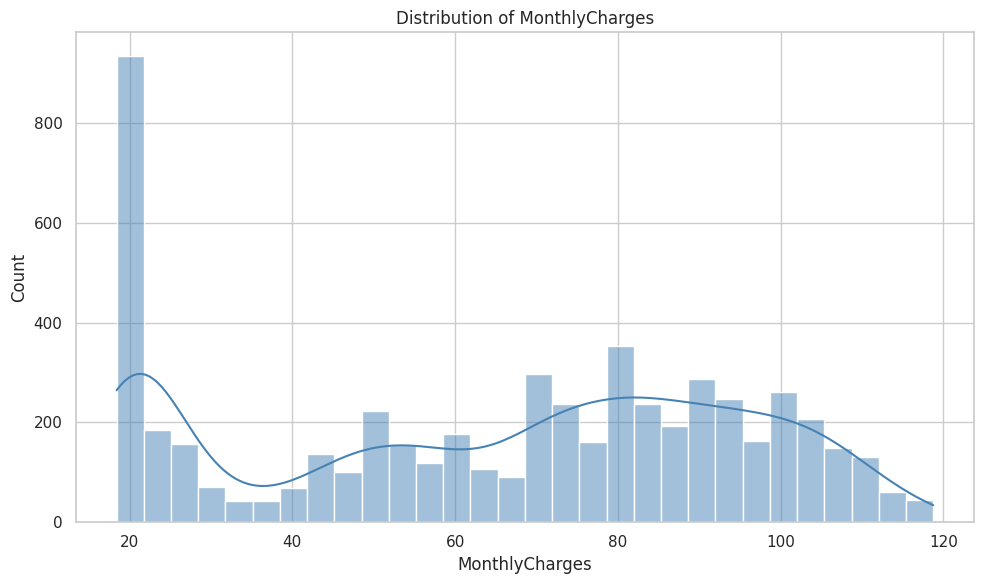

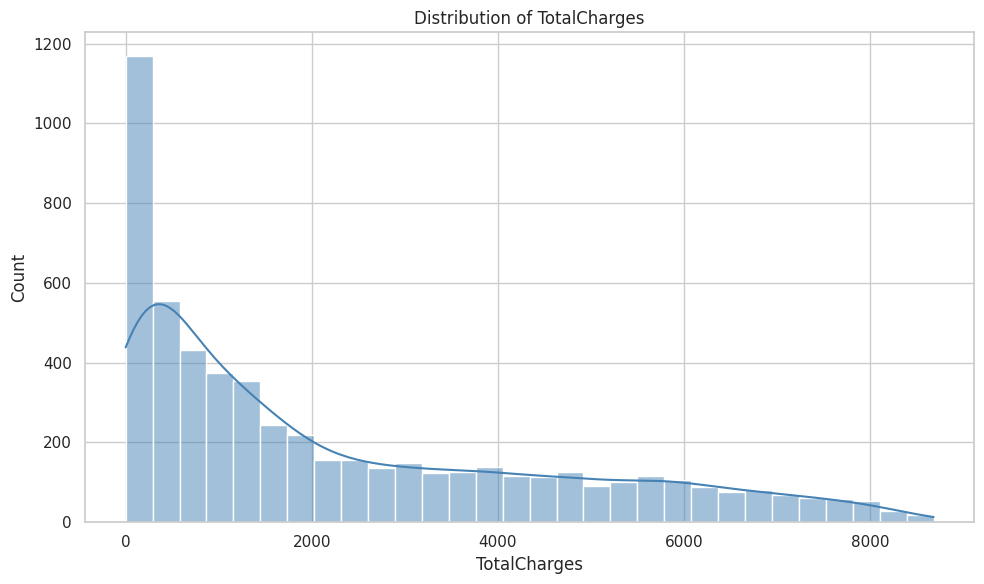

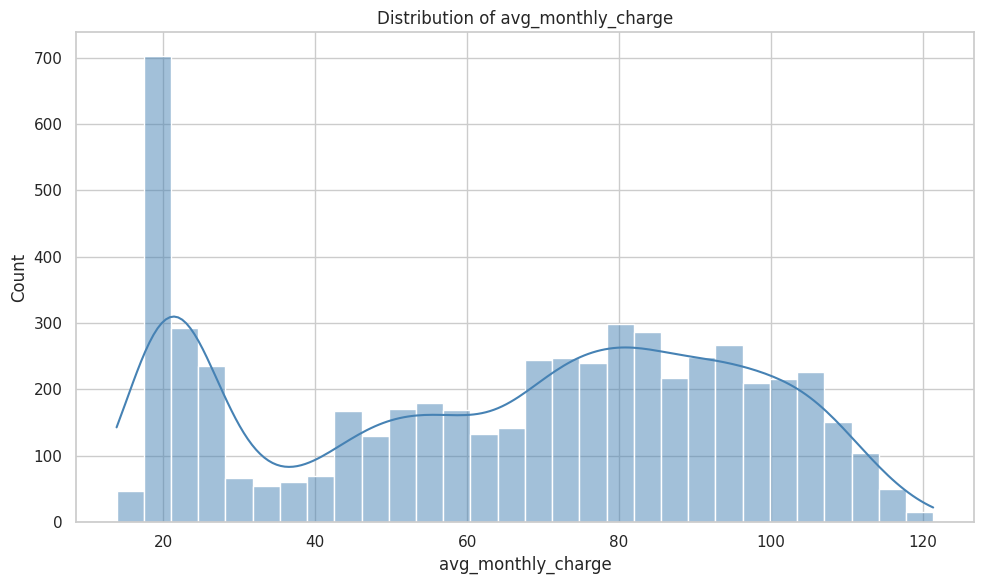

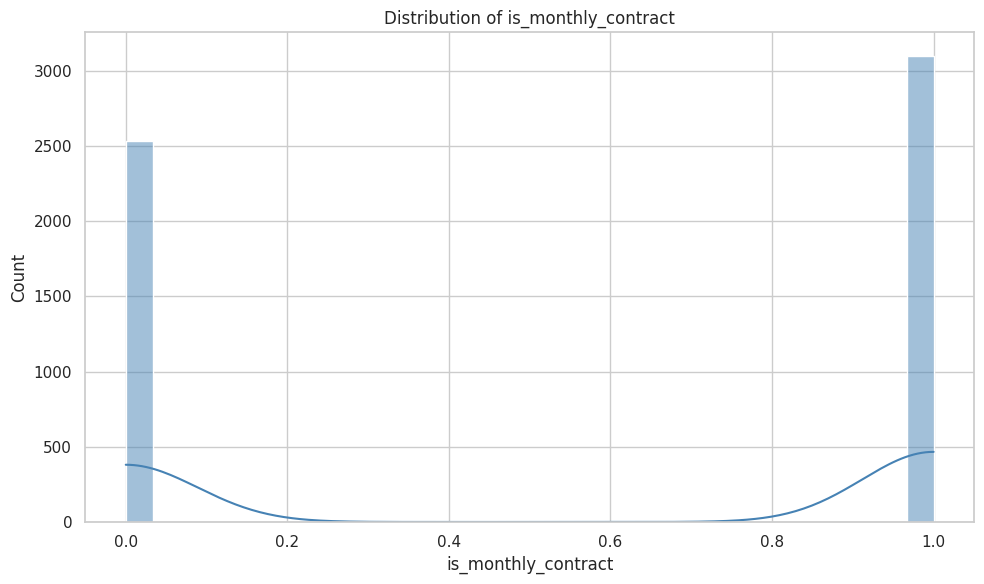

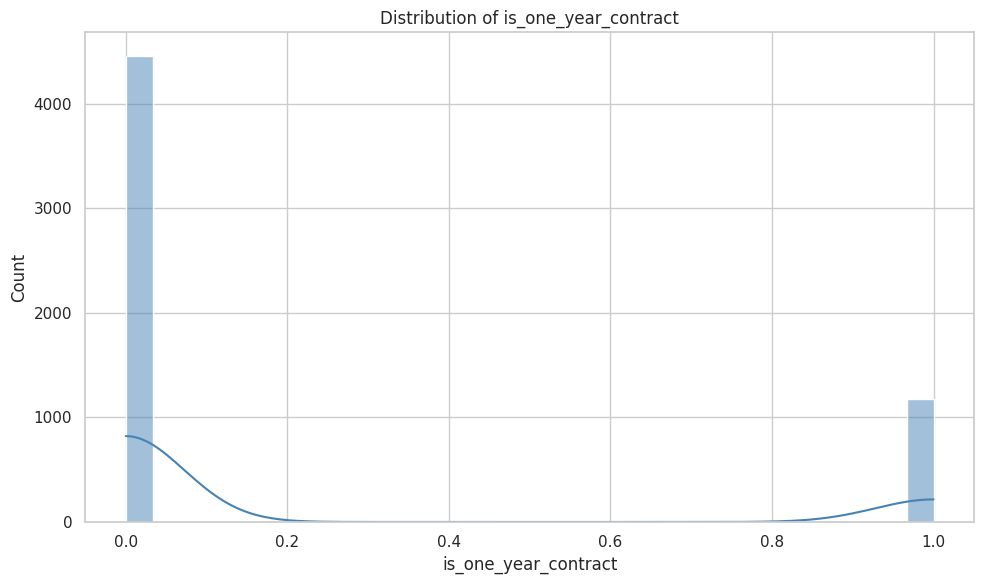

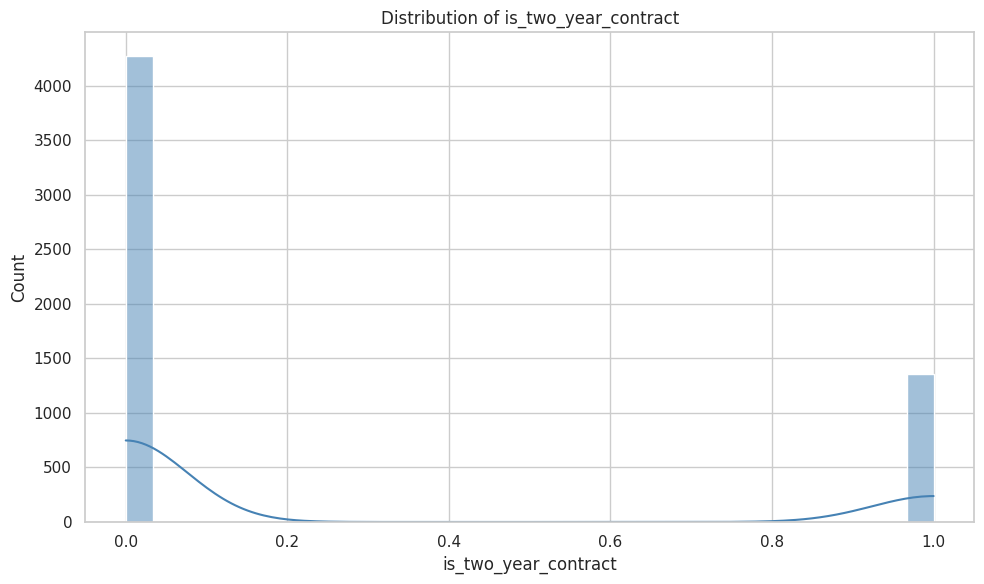

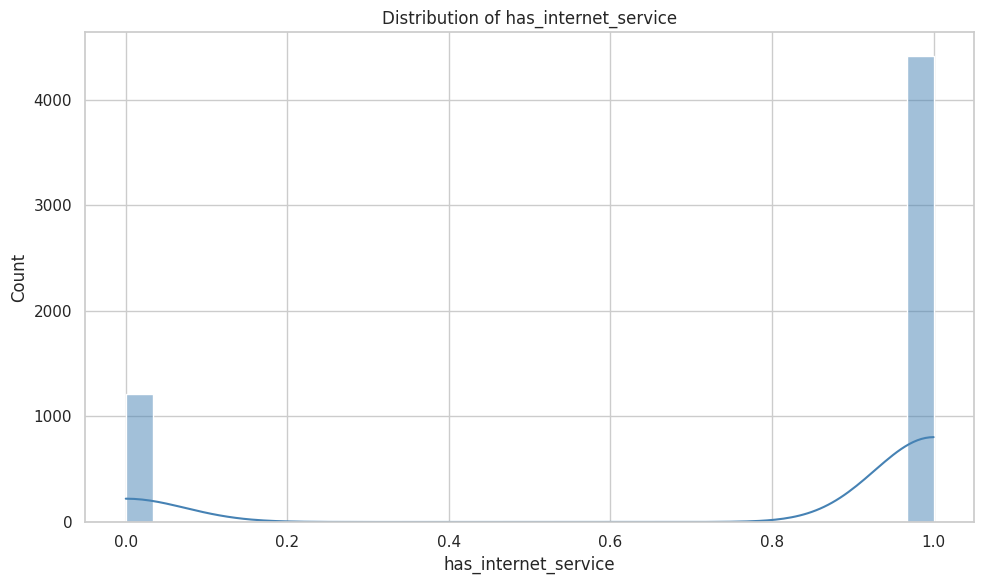

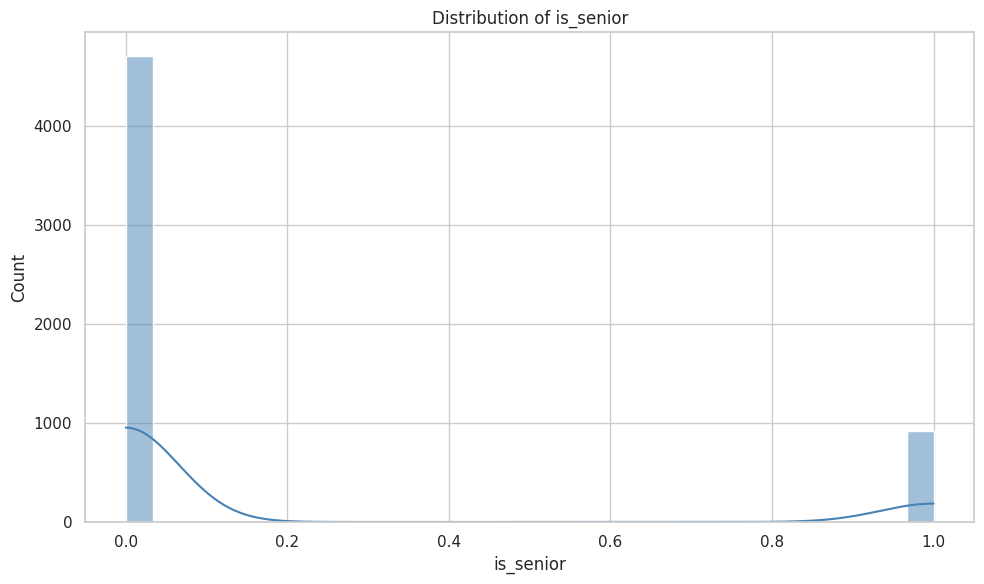

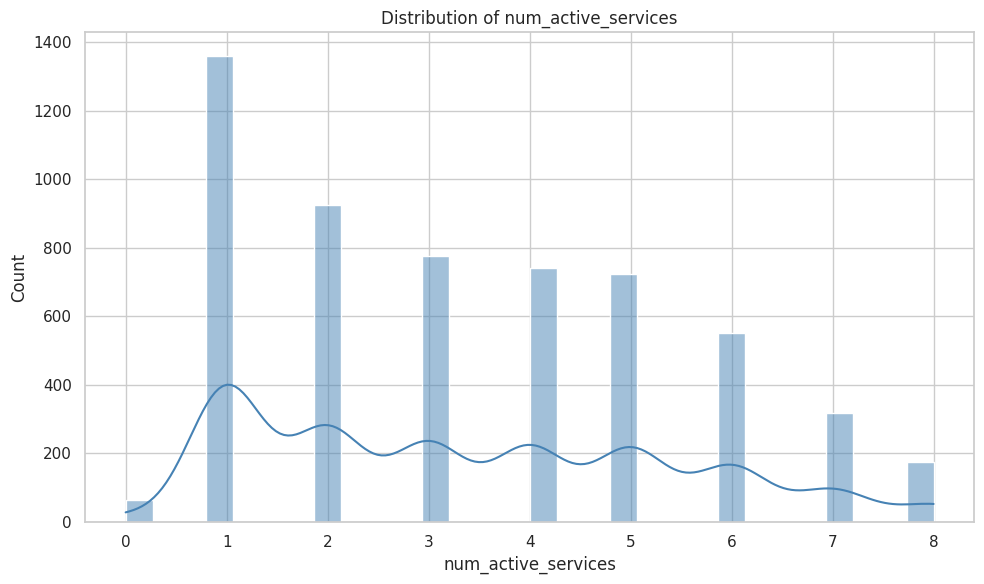

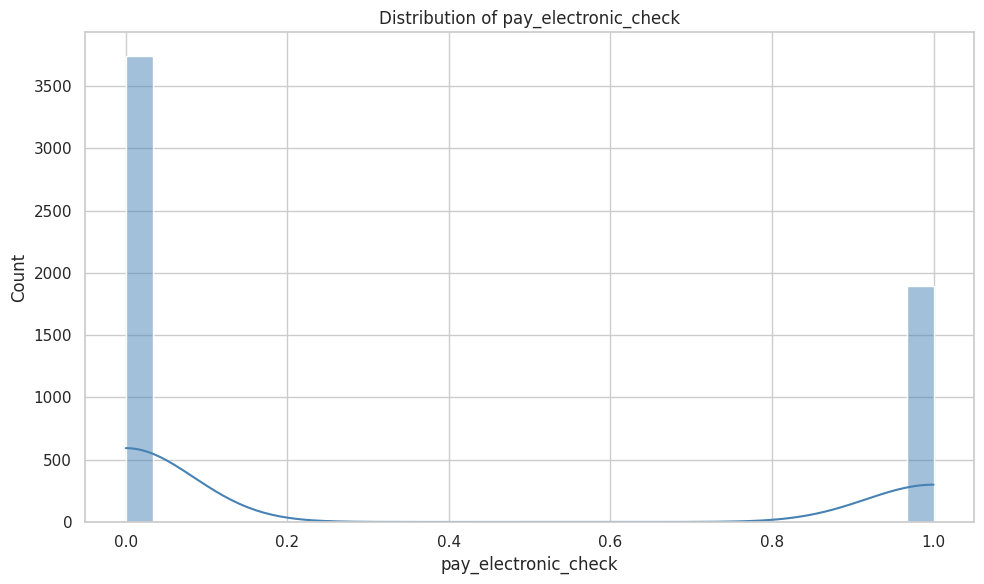

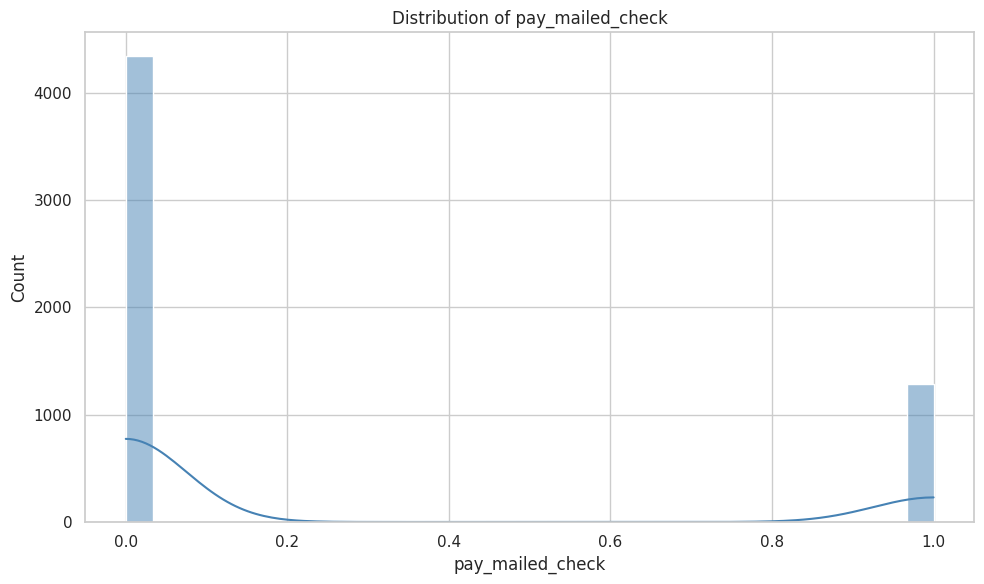

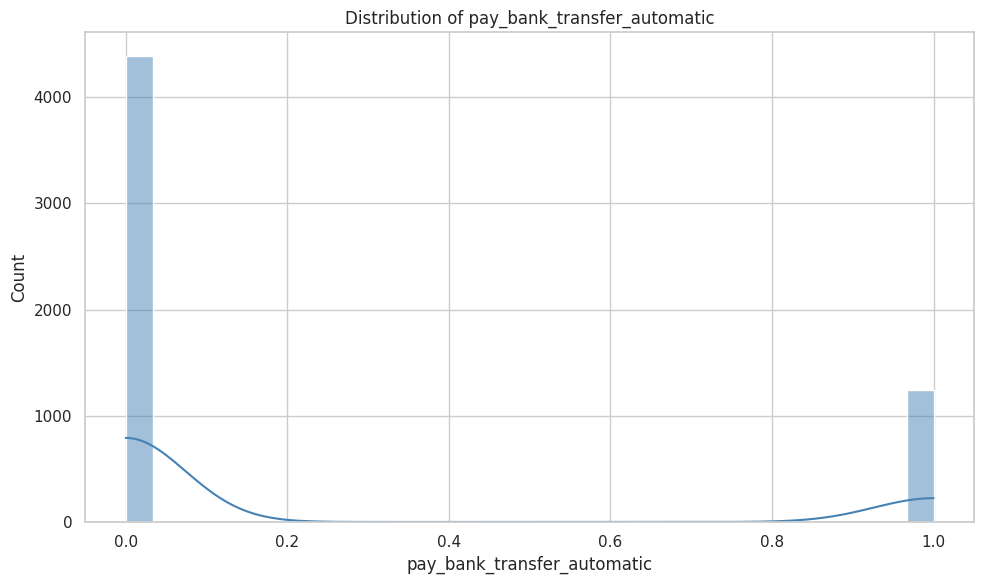

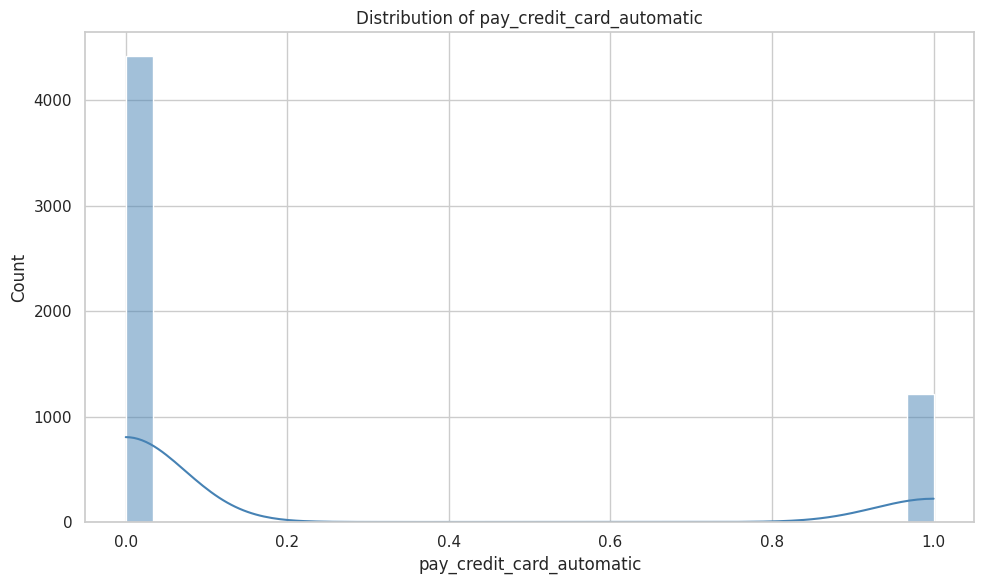

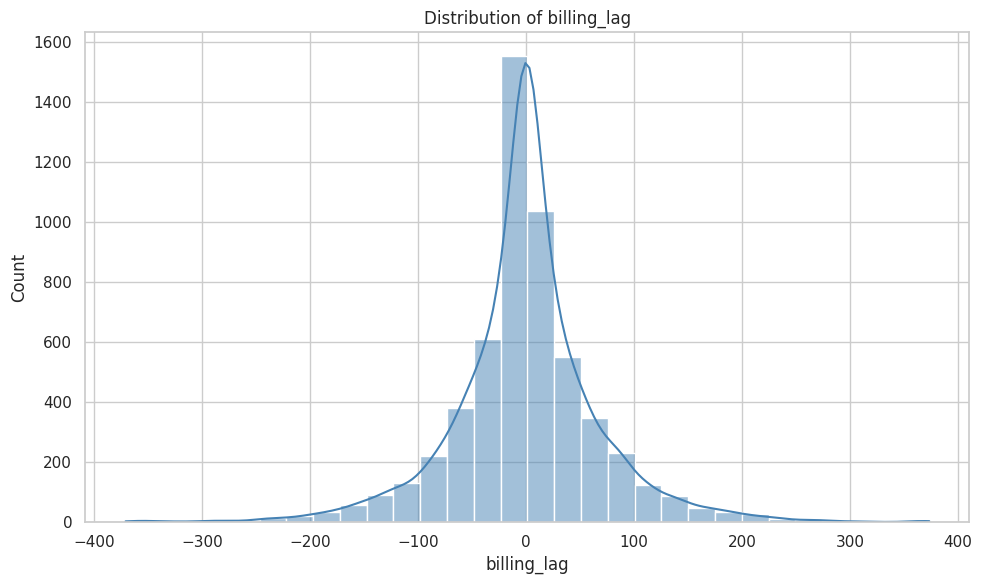

In [9]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
num_cols.remove("Churn")  # exclude target

for col in num_cols:
    fig, ax = plt.subplots()
    sns.histplot(df[col], kde=True, bins=30, ax=ax, color="steelblue")
    ax.set_title(f"Distribution of {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Count")
    plt.tight_layout()
    plt.savefig(FIG_DIR / f"hist_{col}.png")
    plt.show()

Categorical columns (17): ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'tenure_group']


/tmp/ipykernel_1751/1454197480.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


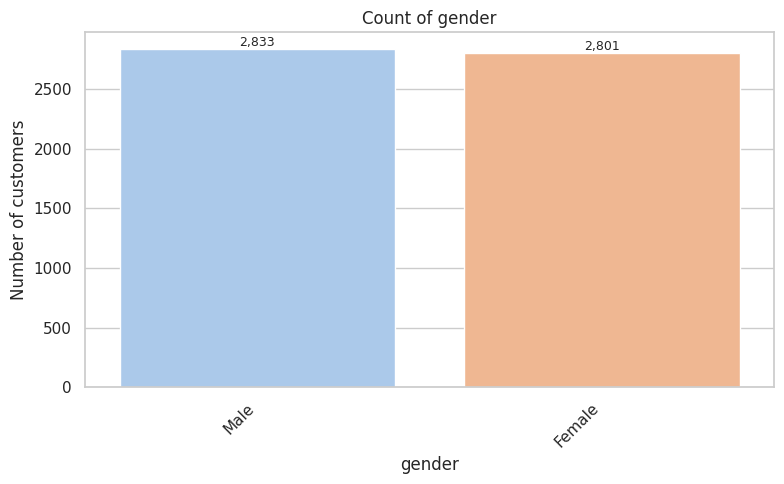

/tmp/ipykernel_1751/1454197480.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


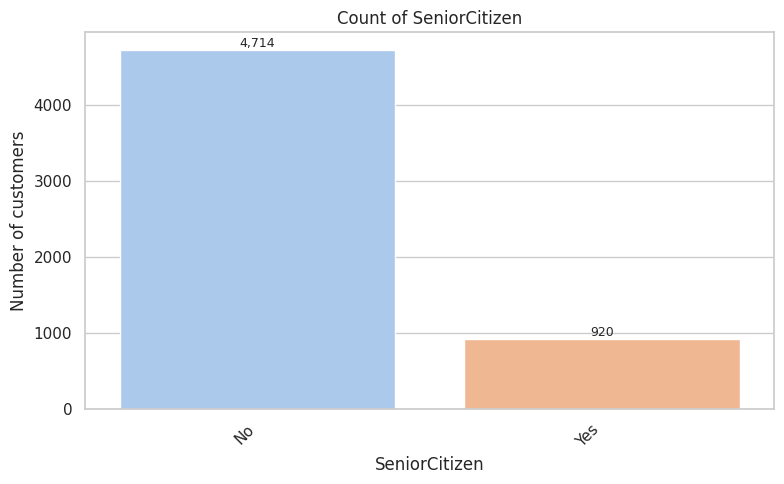

/tmp/ipykernel_1751/1454197480.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


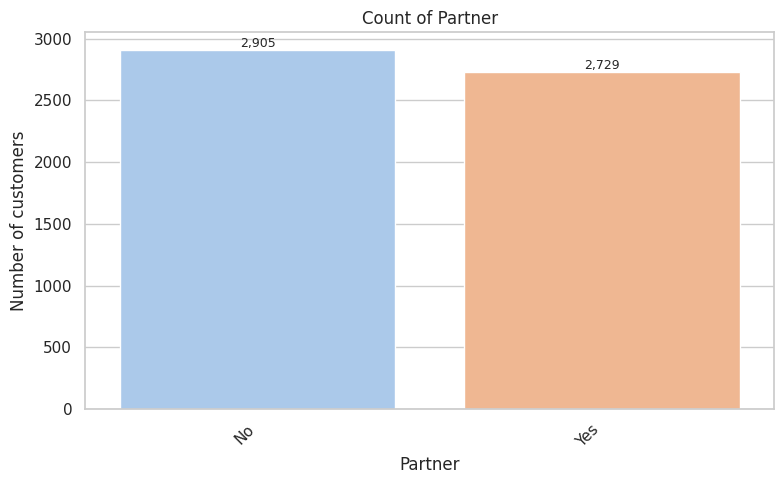

/tmp/ipykernel_1751/1454197480.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


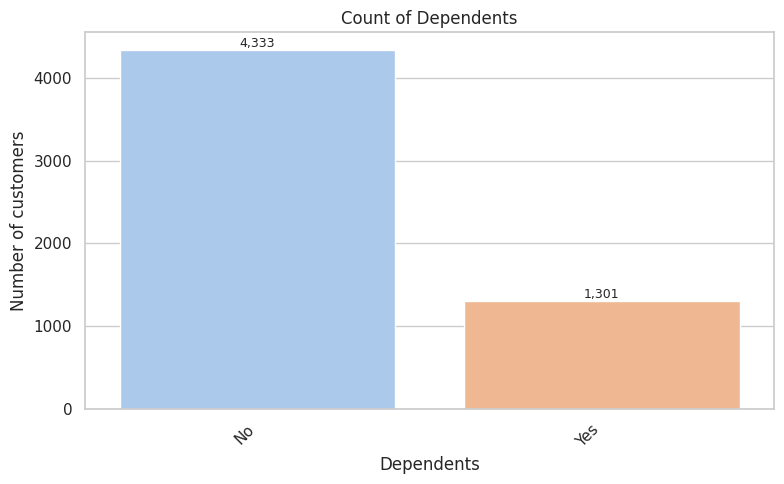

/tmp/ipykernel_1751/1454197480.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


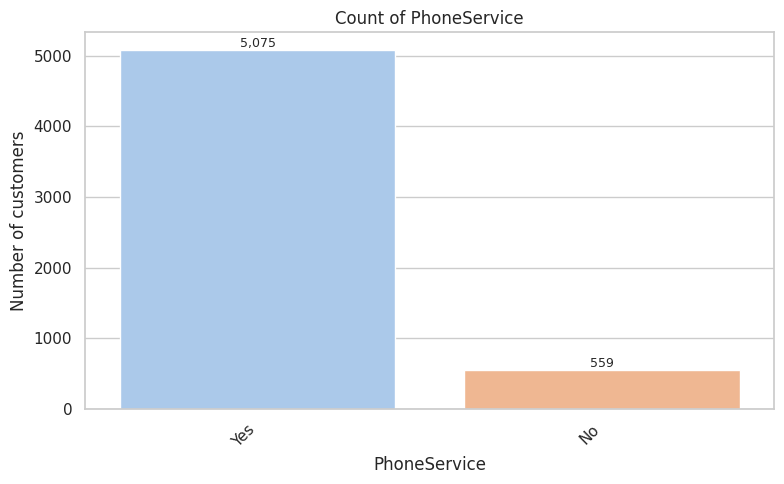

/tmp/ipykernel_1751/1454197480.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


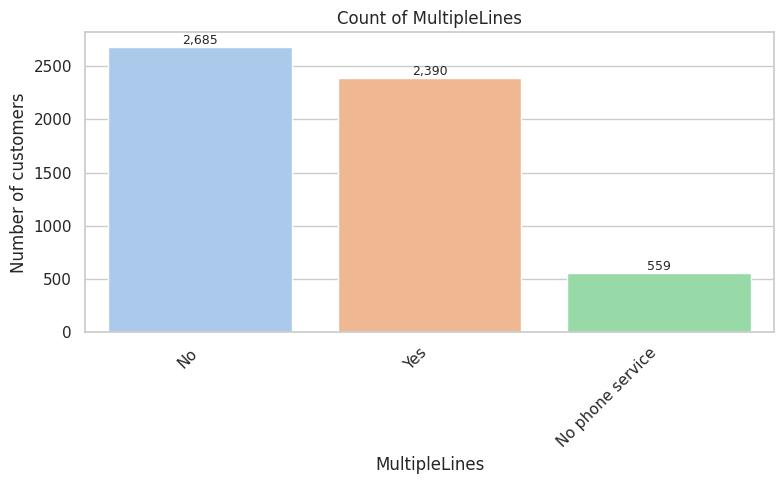

/tmp/ipykernel_1751/1454197480.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


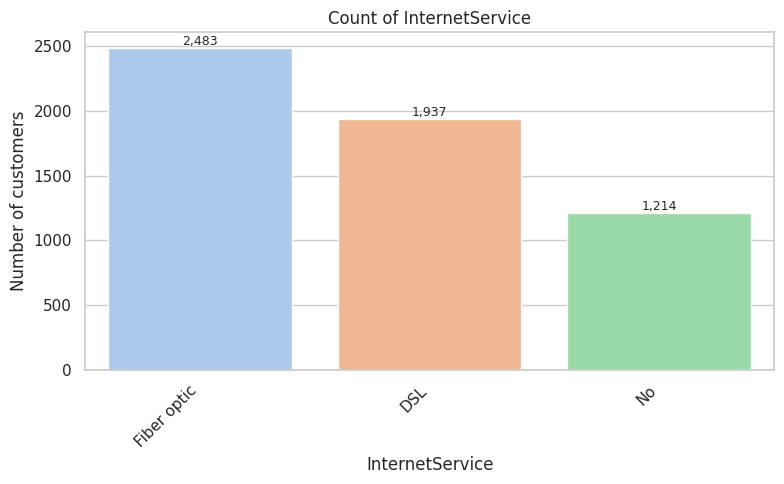

/tmp/ipykernel_1751/1454197480.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


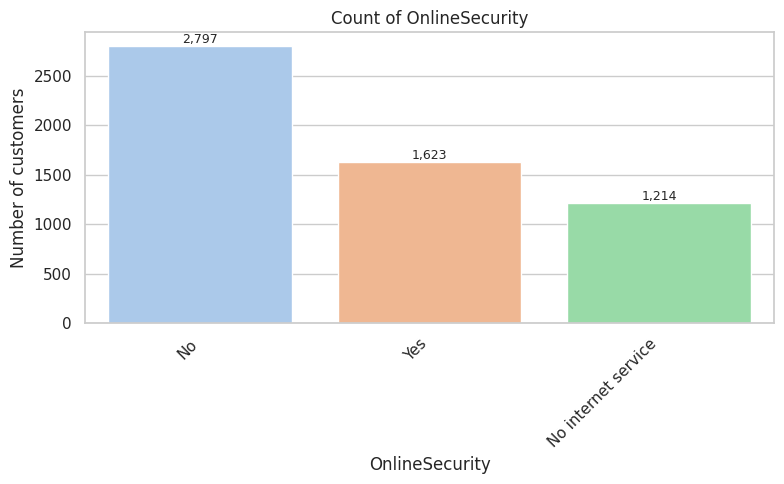

/tmp/ipykernel_1751/1454197480.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


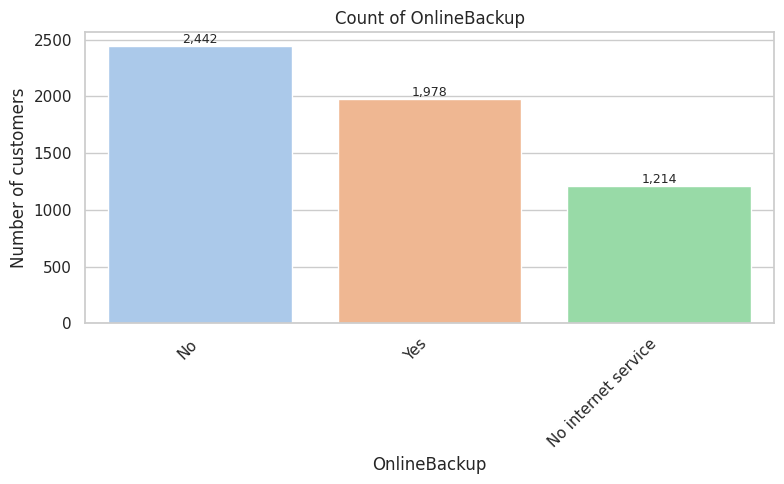

/tmp/ipykernel_1751/1454197480.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


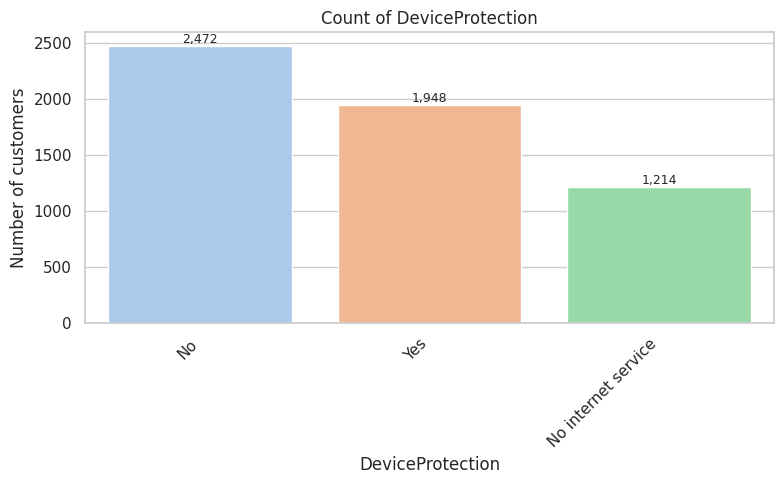

/tmp/ipykernel_1751/1454197480.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


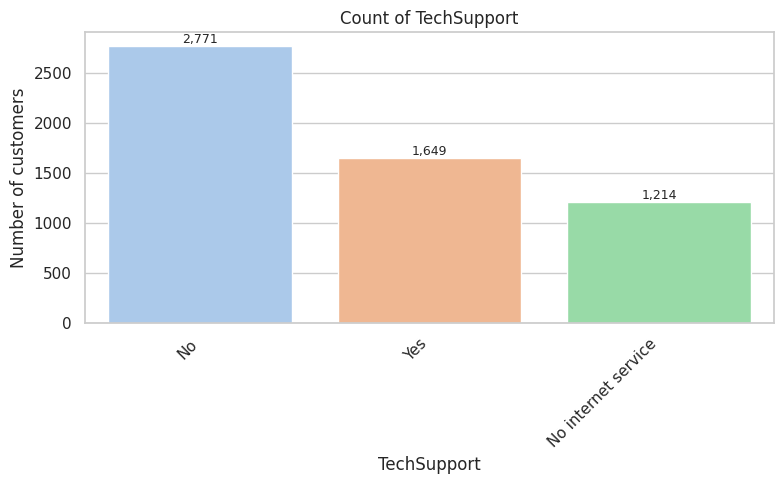

/tmp/ipykernel_1751/1454197480.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


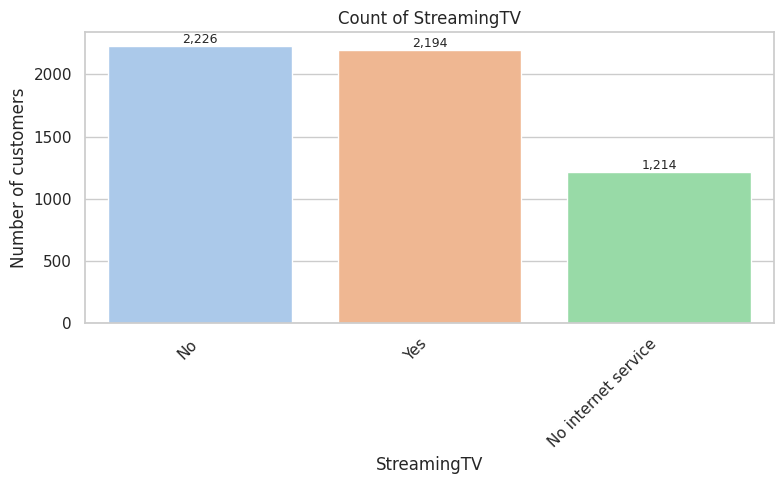

/tmp/ipykernel_1751/1454197480.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


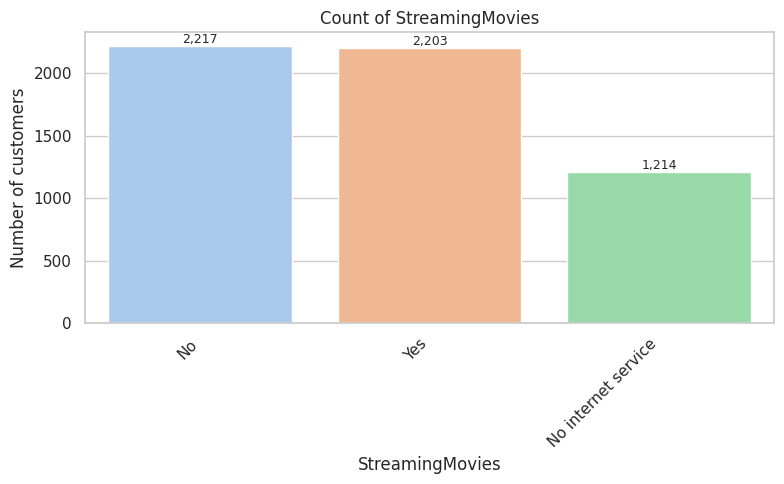

/tmp/ipykernel_1751/1454197480.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


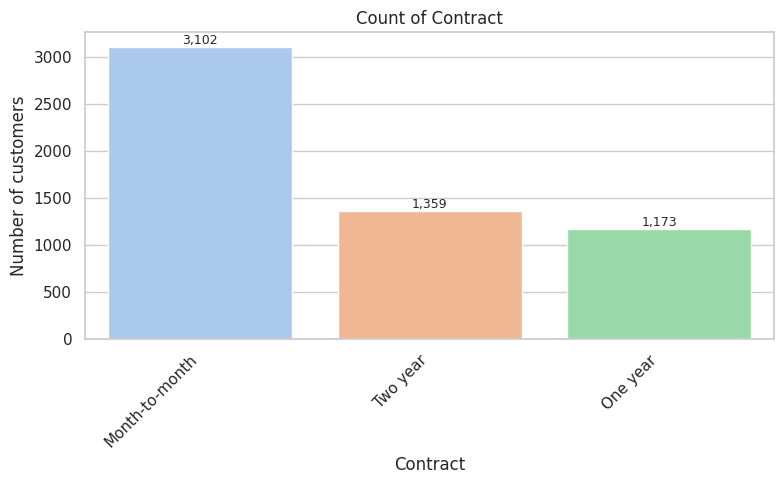

/tmp/ipykernel_1751/1454197480.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


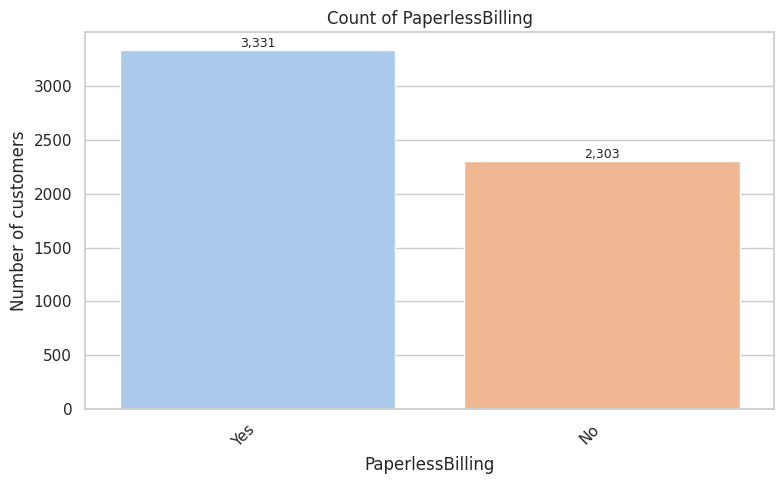

/tmp/ipykernel_1751/1454197480.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


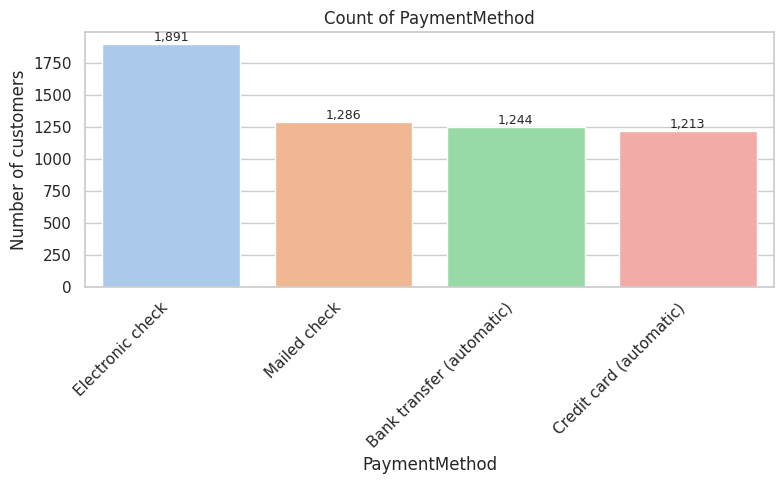

/tmp/ipykernel_1751/1454197480.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


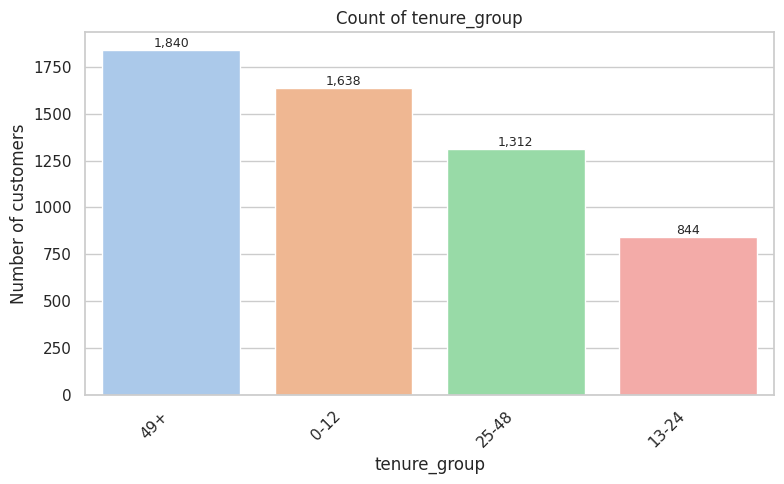

In [10]:
# %%
# ------------------------------------------------------------------
# Univariate analysis – Categorical features (count plots)
# ------------------------------------------------------------------

import matplotlib.pyplot as plt
import seaborn as sns

TARGET = "Churn"

# Select categorical / object columns
cat_cols = df.select_dtypes(include=["category", "object"]).columns.tolist()

# Safely exclude target if present (robust to dtype changes)
cat_cols = [c for c in cat_cols if c != TARGET]

print(f"Categorical columns ({len(cat_cols)}): {cat_cols}")

for col in cat_cols:
    fig, ax = plt.subplots(figsize=(8, 5))

    order = df[col].value_counts(dropna=False).index

    sns.countplot(
        x=col,
        data=df,
        order=order,
        palette="pastel",
        ax=ax
    )

    ax.set_title(f"Count of {col}")
    ax.set_ylabel("Number of customers")
    ax.set_xlabel(col)

    # Annotate bars
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(
                f"{int(height):,}",
                (p.get_x() + p.get_width() / 2, height),
                ha="center",
                va="bottom",
                fontsize=9
            )

    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()

    # Save figure (assumes FIG_DIR exists)
    plt.savefig(FIG_DIR / f"count_{col}.png", dpi=150)
    plt.show()


/tmp/ipykernel_1751/3958004769.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y=col, data=df, palette="Set2", ax=ax)


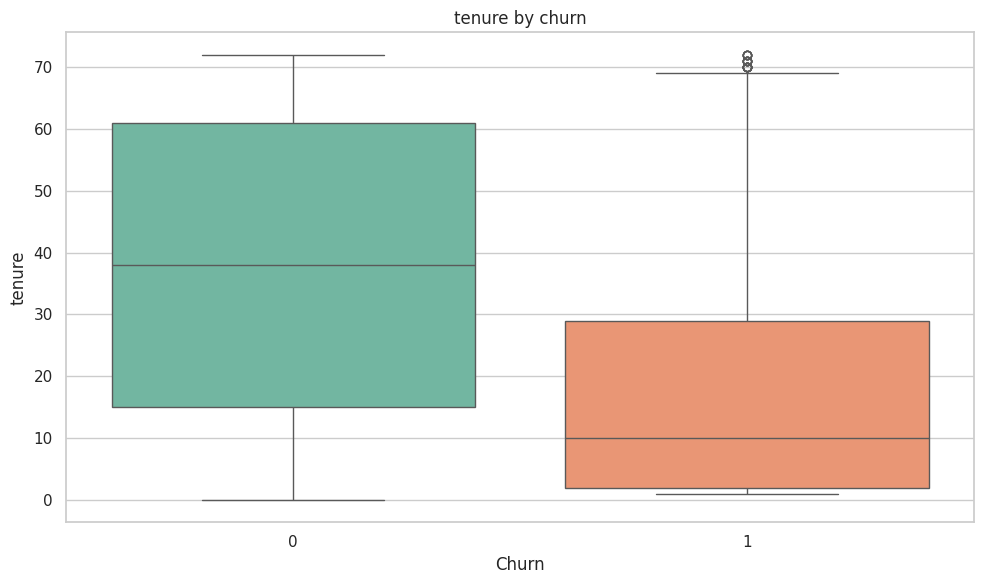

/tmp/ipykernel_1751/3958004769.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y=col, data=df, palette="Set2", ax=ax)


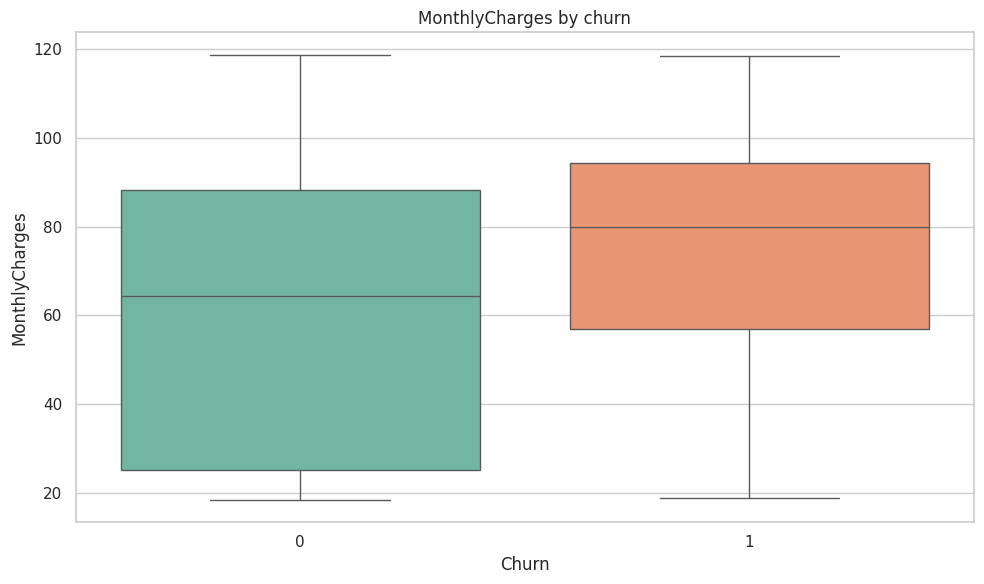

/tmp/ipykernel_1751/3958004769.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y=col, data=df, palette="Set2", ax=ax)


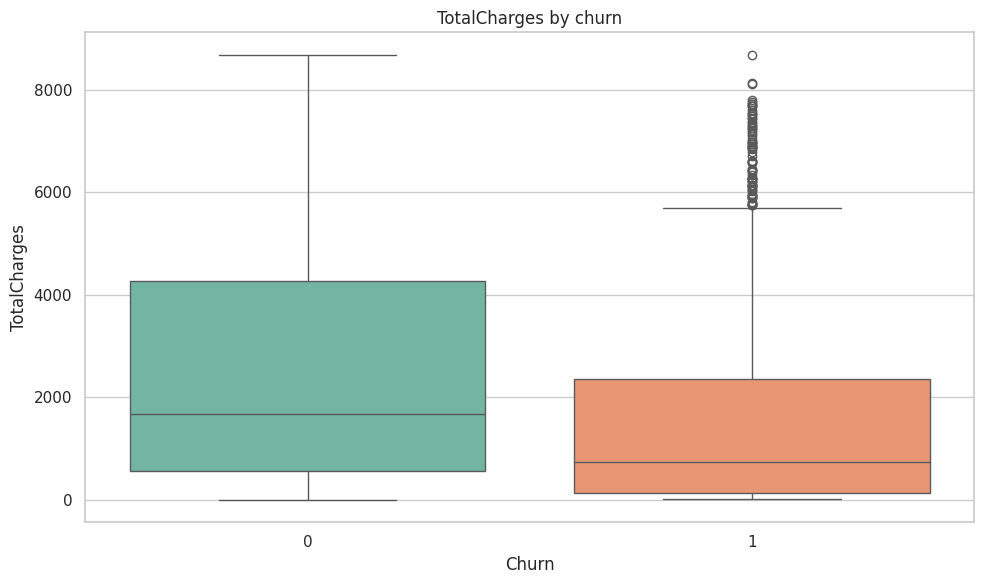

/tmp/ipykernel_1751/3958004769.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y=col, data=df, palette="Set2", ax=ax)


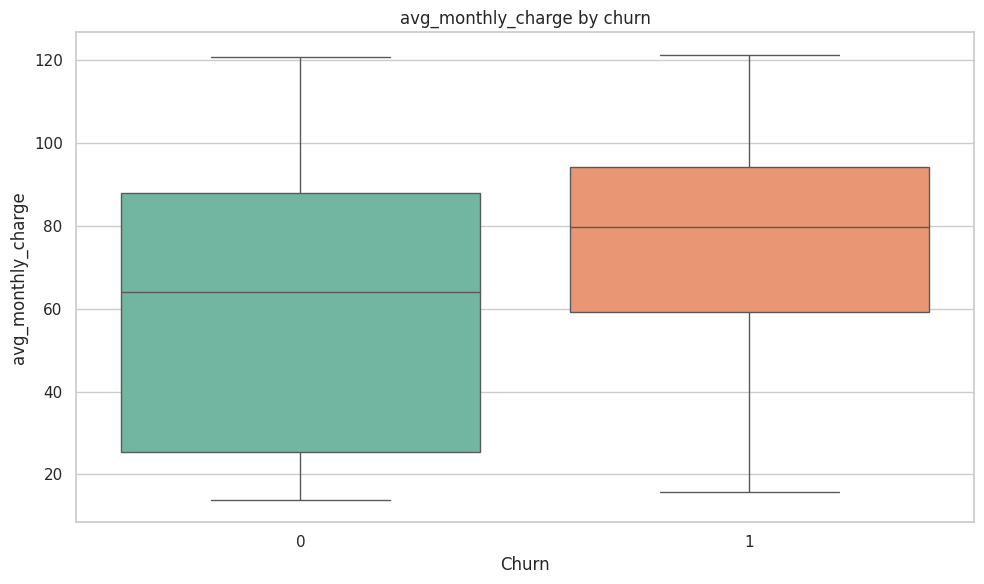

/tmp/ipykernel_1751/3958004769.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y=col, data=df, palette="Set2", ax=ax)


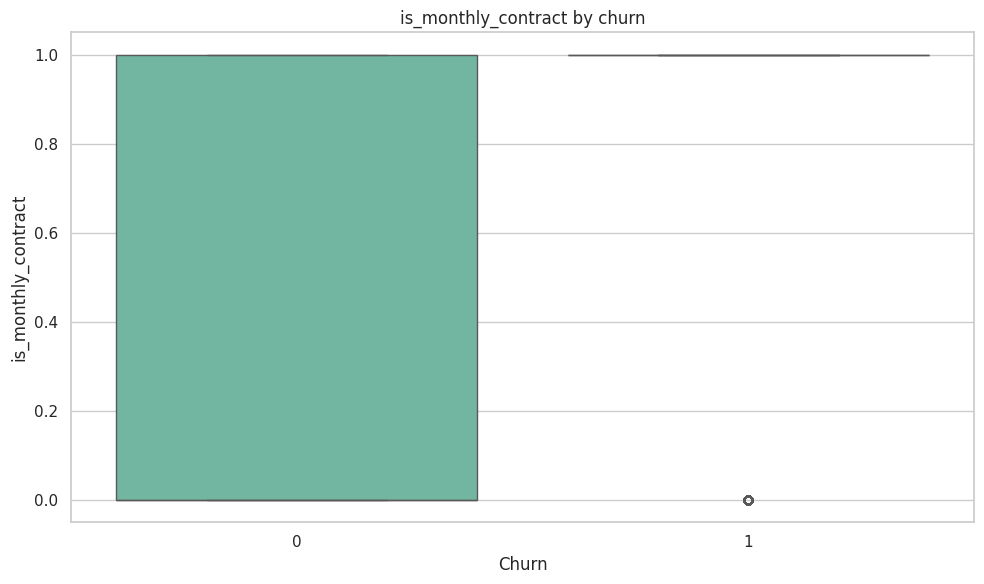

/tmp/ipykernel_1751/3958004769.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y=col, data=df, palette="Set2", ax=ax)


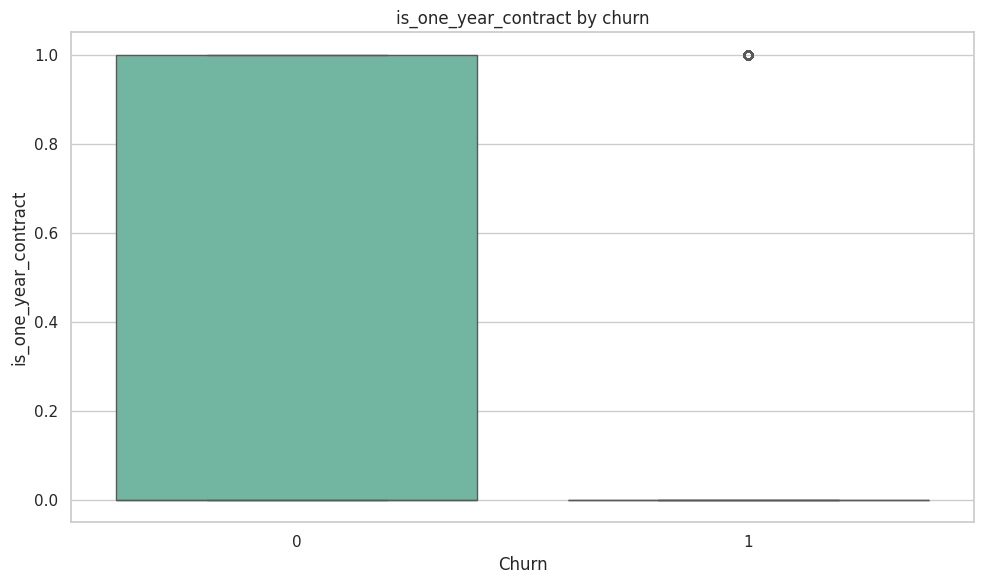

/tmp/ipykernel_1751/3958004769.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y=col, data=df, palette="Set2", ax=ax)


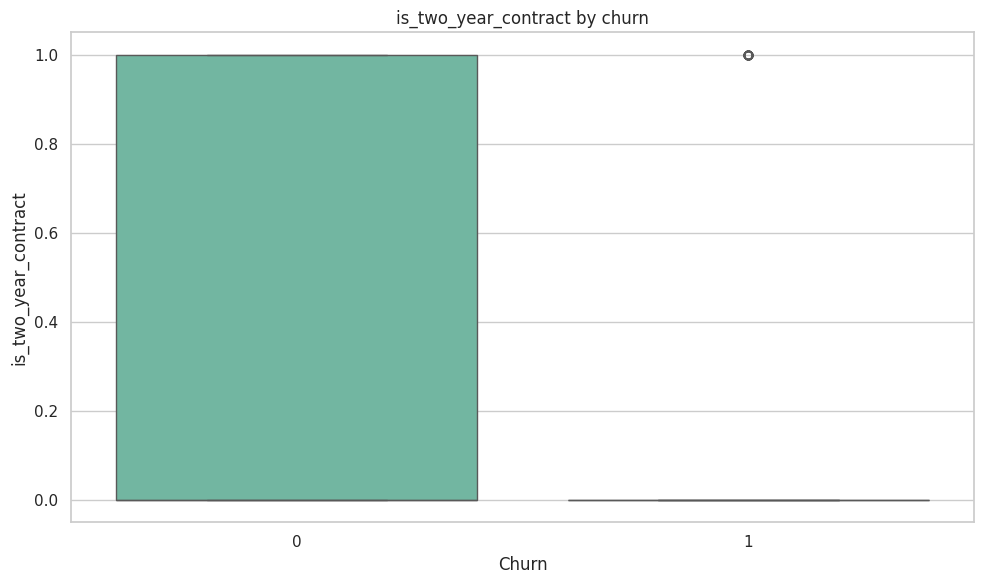

/tmp/ipykernel_1751/3958004769.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y=col, data=df, palette="Set2", ax=ax)


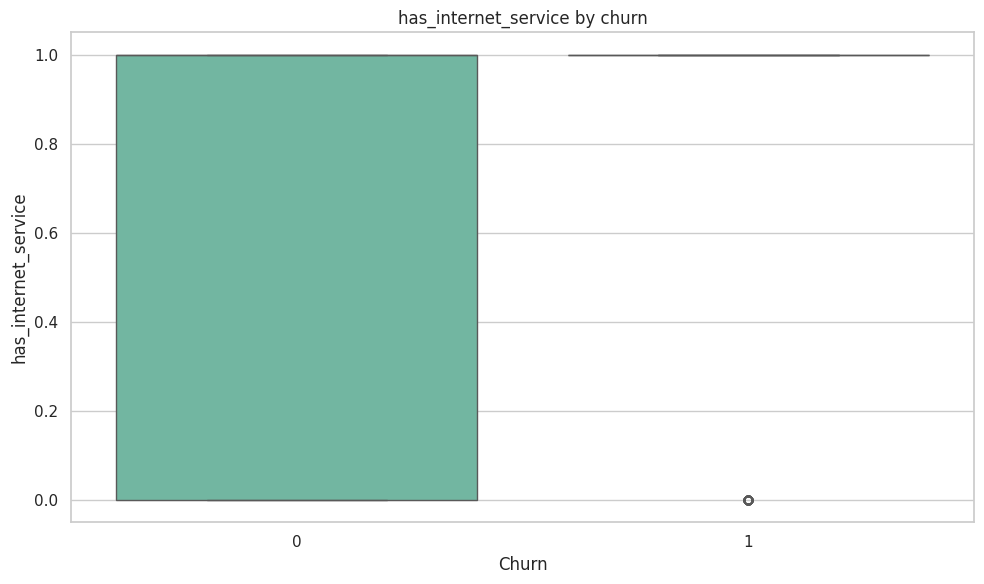

/tmp/ipykernel_1751/3958004769.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y=col, data=df, palette="Set2", ax=ax)


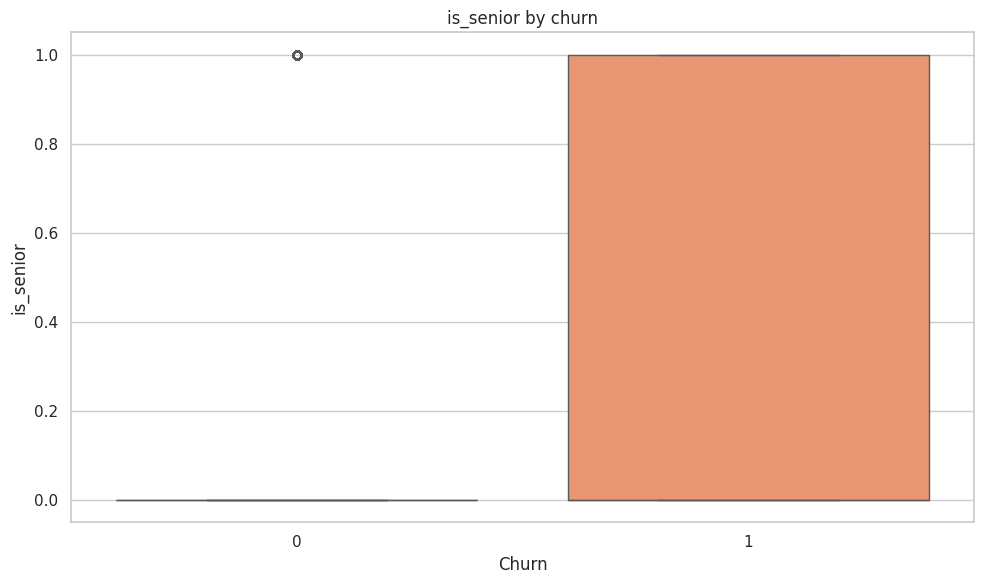

/tmp/ipykernel_1751/3958004769.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y=col, data=df, palette="Set2", ax=ax)


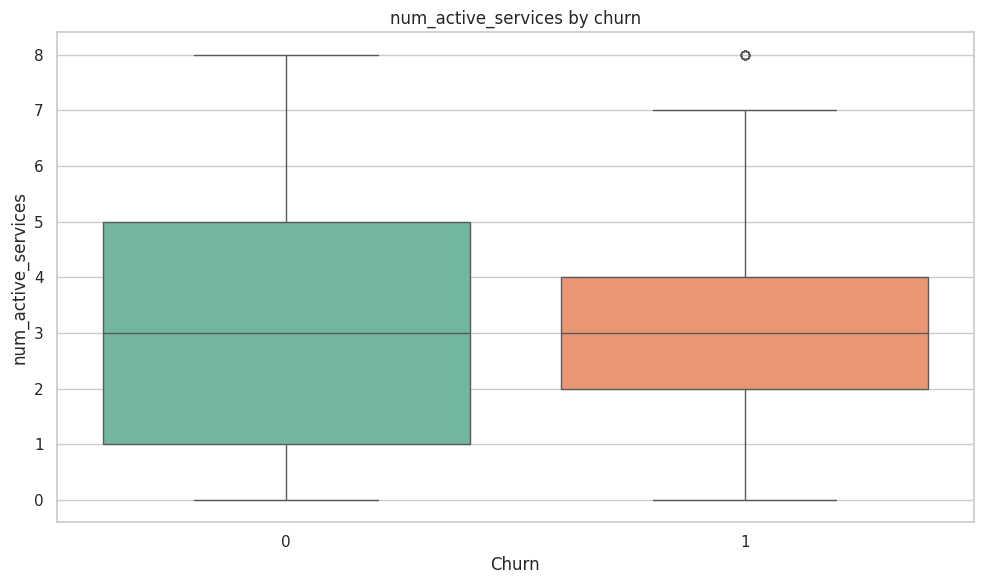

/tmp/ipykernel_1751/3958004769.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y=col, data=df, palette="Set2", ax=ax)


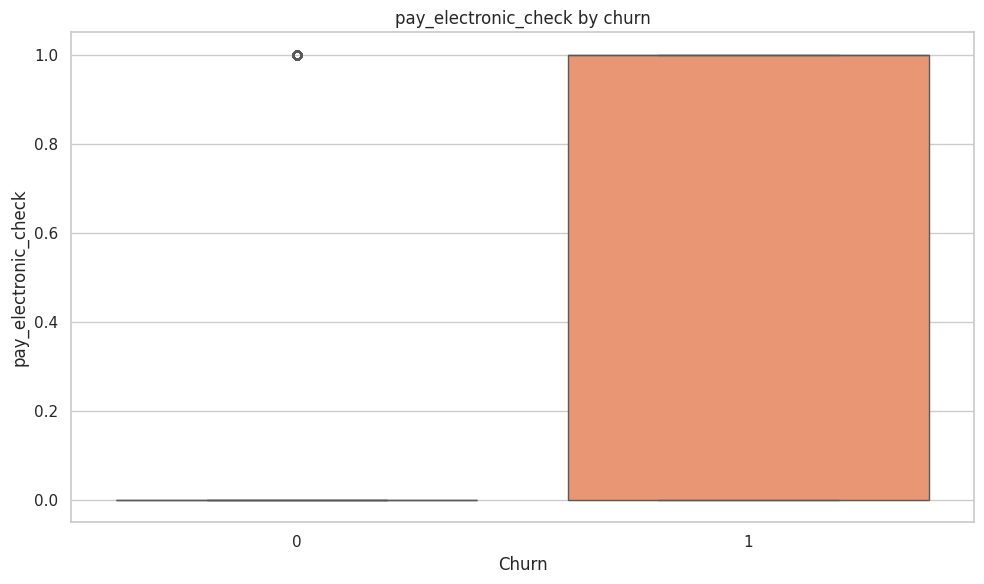

/tmp/ipykernel_1751/3958004769.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y=col, data=df, palette="Set2", ax=ax)


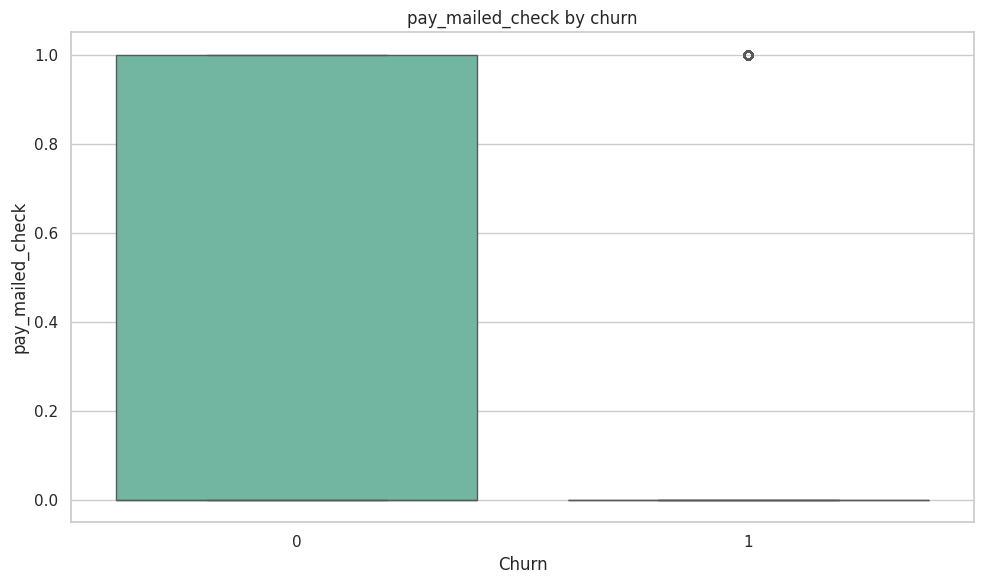

/tmp/ipykernel_1751/3958004769.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y=col, data=df, palette="Set2", ax=ax)


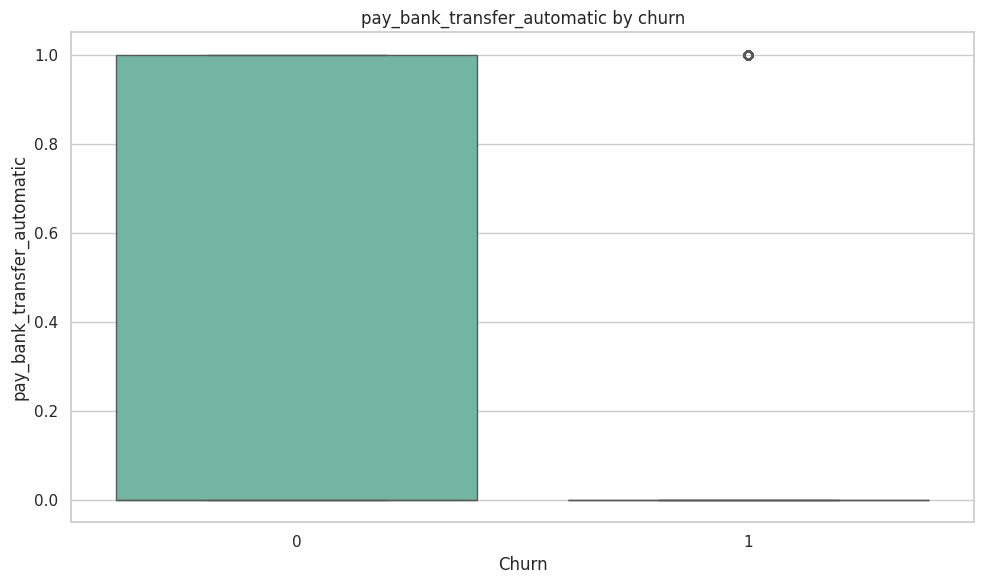

/tmp/ipykernel_1751/3958004769.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y=col, data=df, palette="Set2", ax=ax)


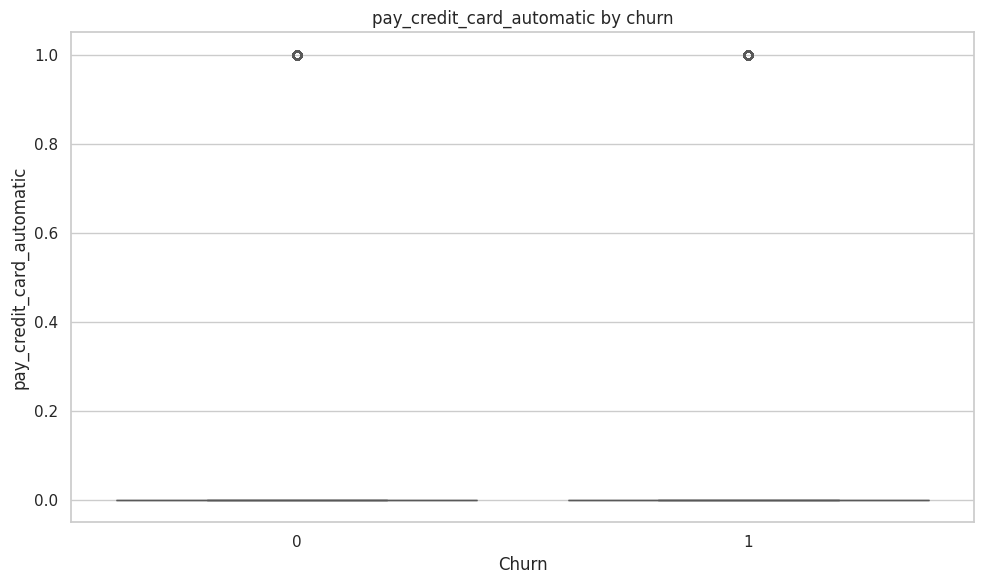

/tmp/ipykernel_1751/3958004769.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y=col, data=df, palette="Set2", ax=ax)


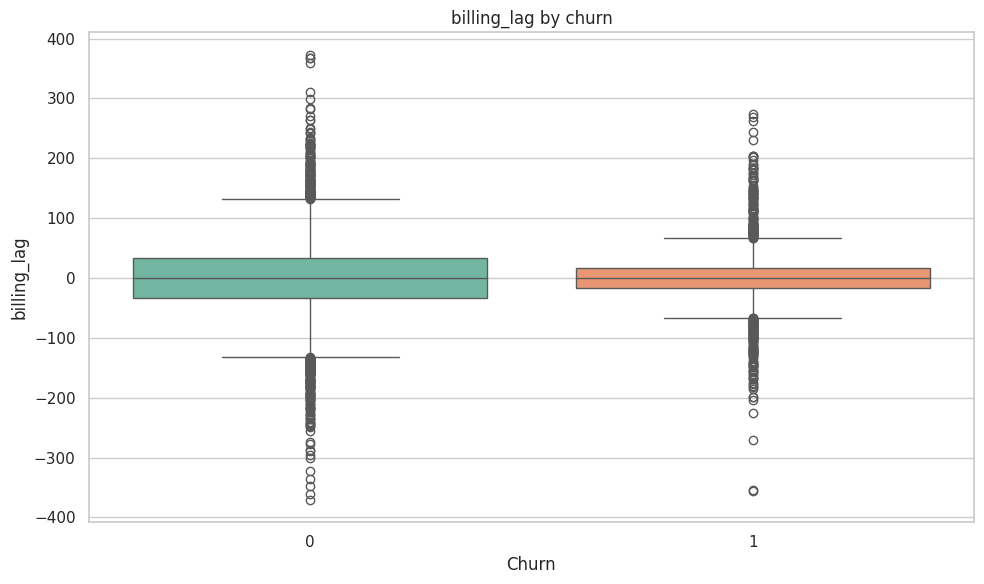

In [11]:
for col in num_cols:
    fig, ax = plt.subplots()
    sns.boxplot(x="Churn", y=col, data=df, palette="Set2", ax=ax)
    ax.set_title(f"{col} by churn")
    plt.tight_layout()
    plt.savefig(FIG_DIR / f"box_{col}_by_churn.png")
    plt.show()

In [12]:
def churn_rate_by_category(col_name):
    """Return a DataFrame with churn rate per category."""
    ct = pd.crosstab(df[col_name], df["Churn"], normalize="index") * 100
    ct = ct.round(2)
    ct.columns = ["No churn %", "Churn %"]
    return ct

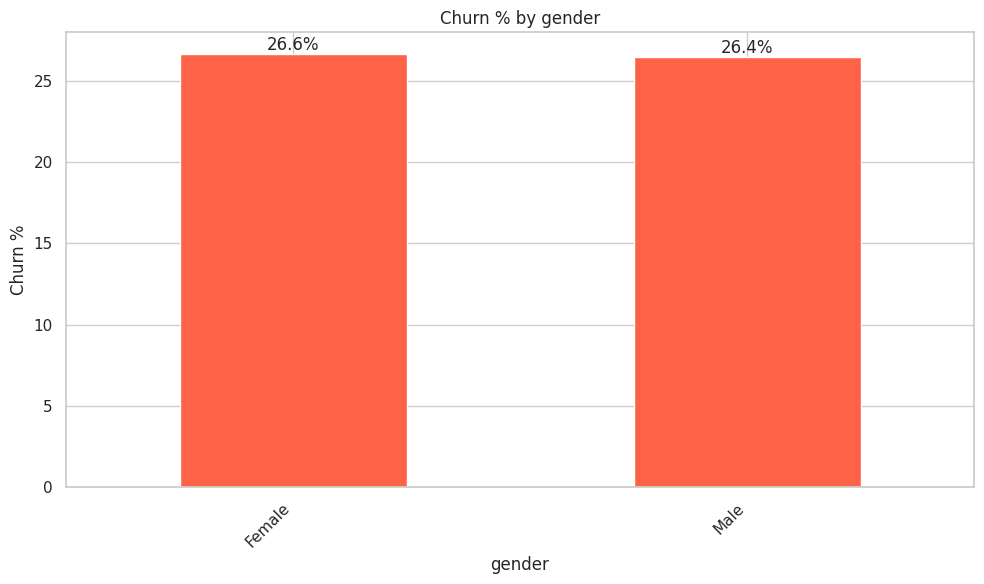

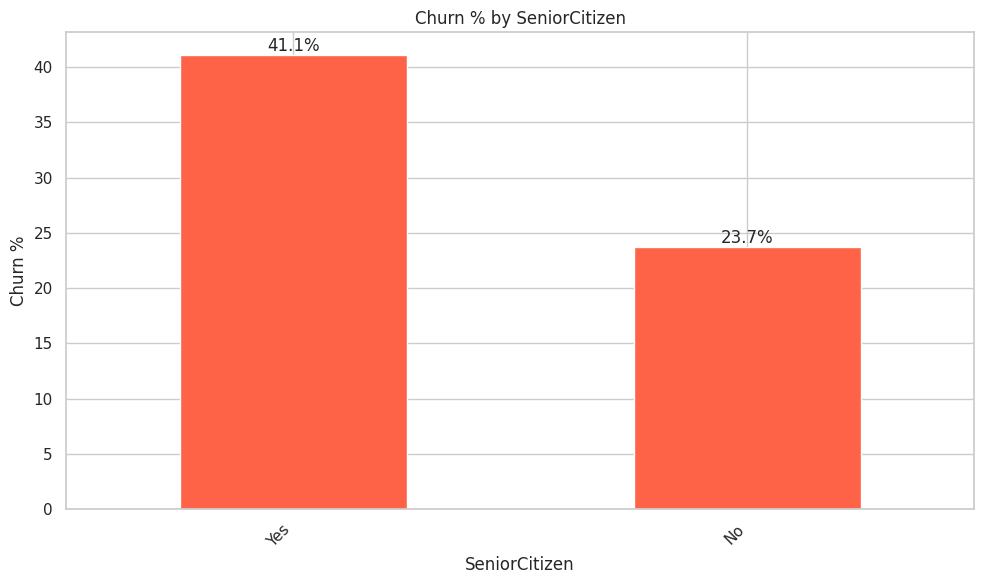

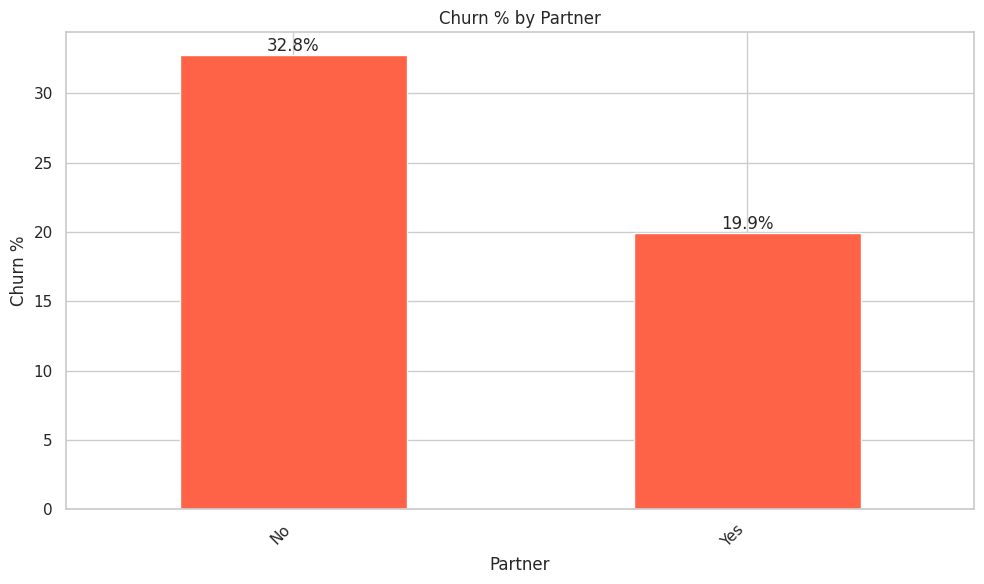

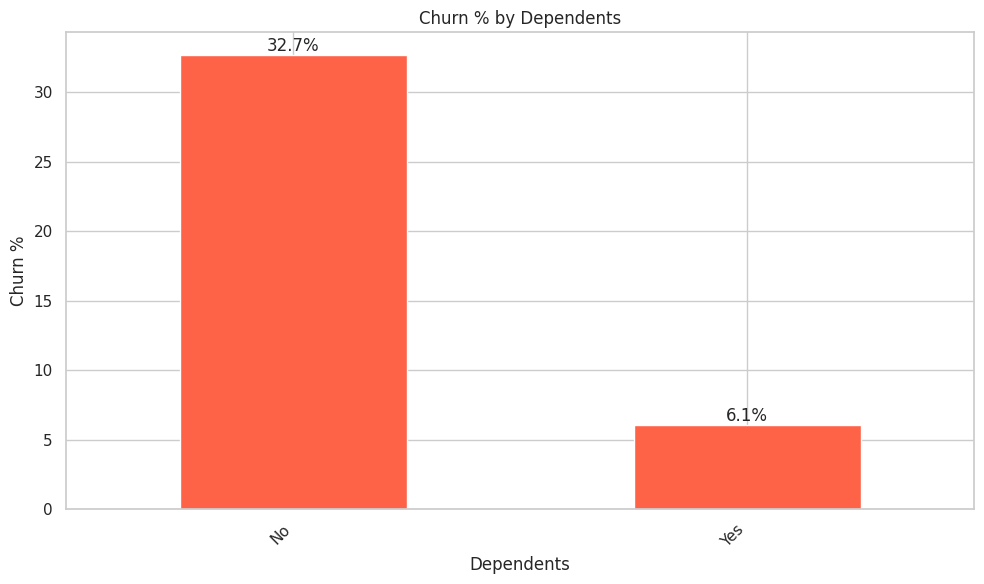

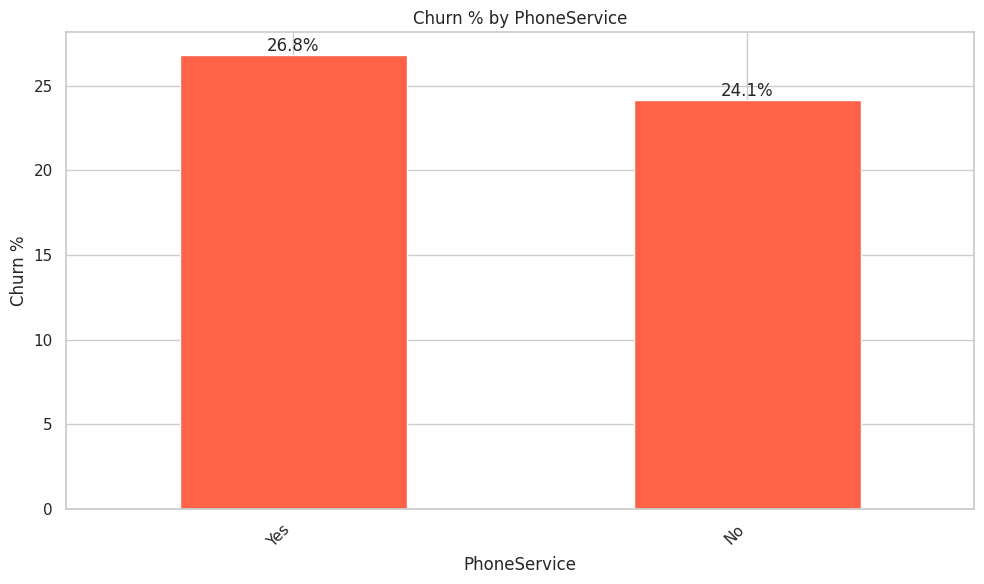

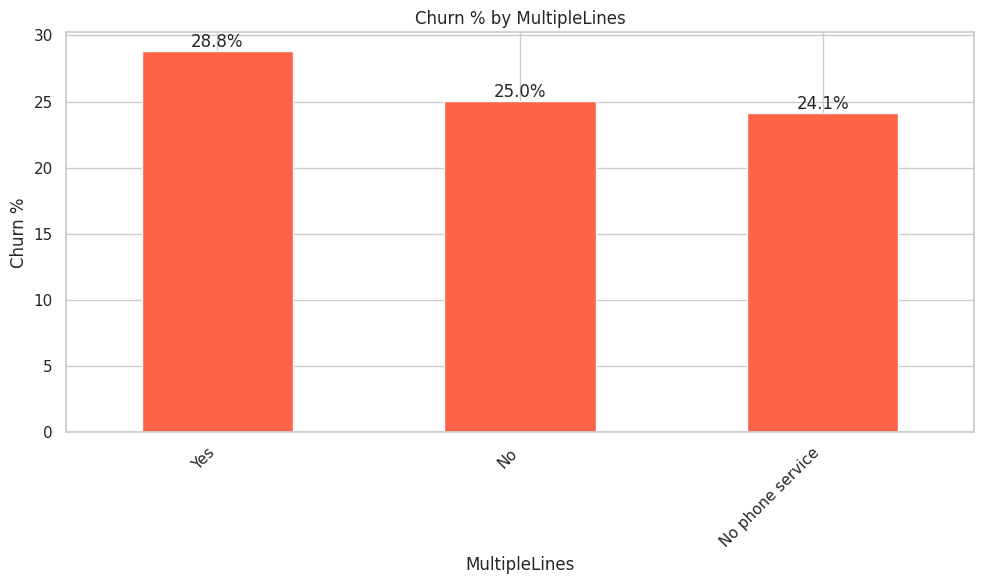

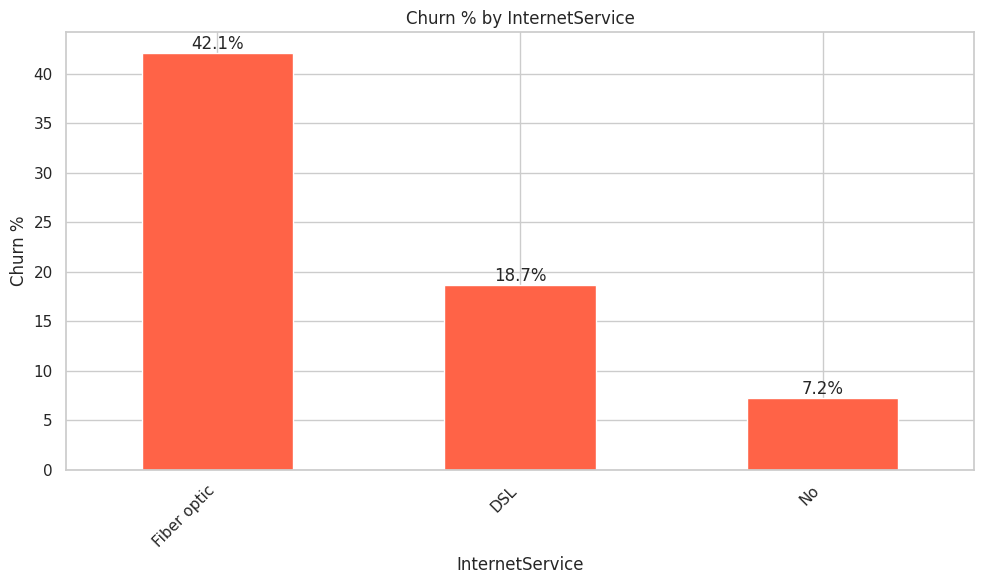

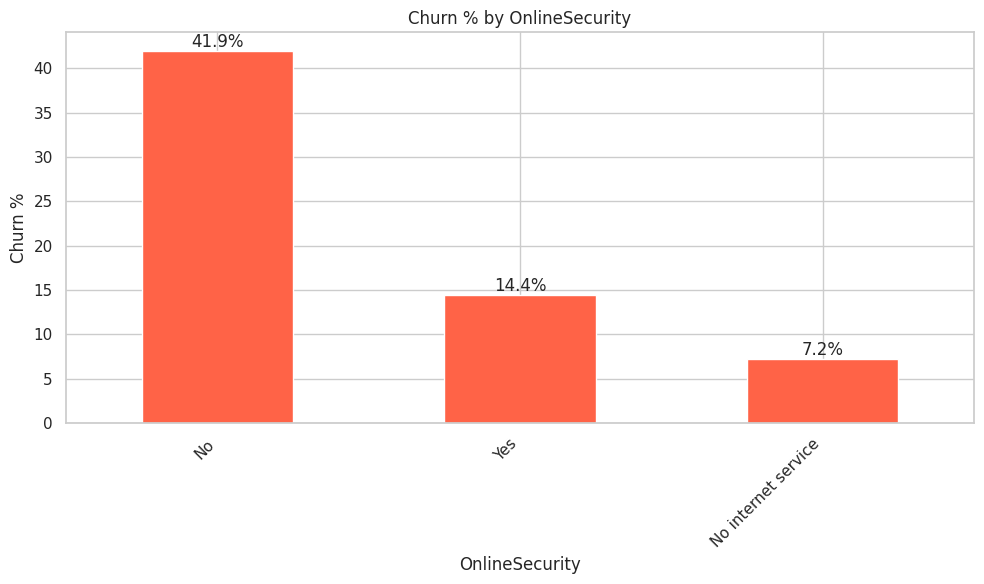

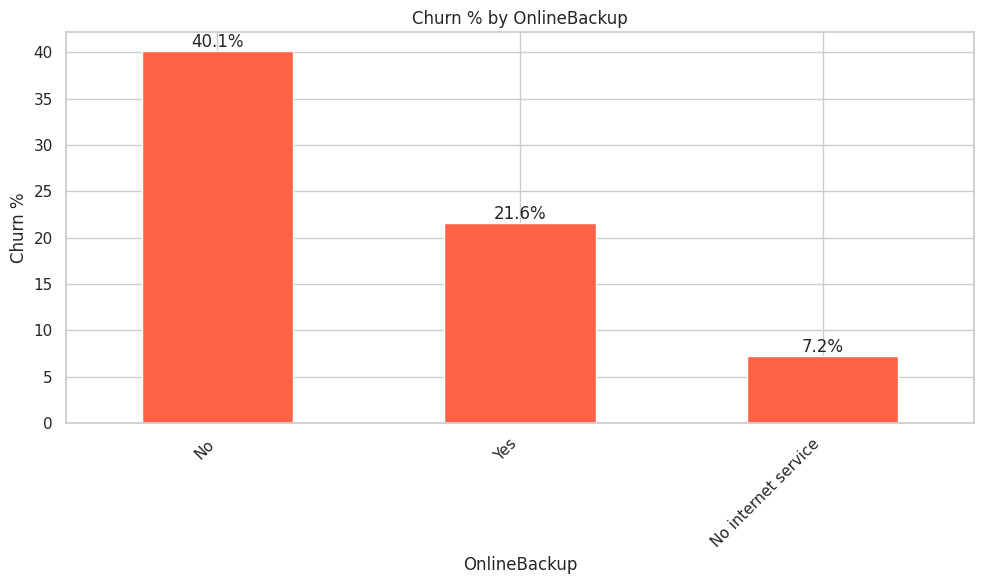

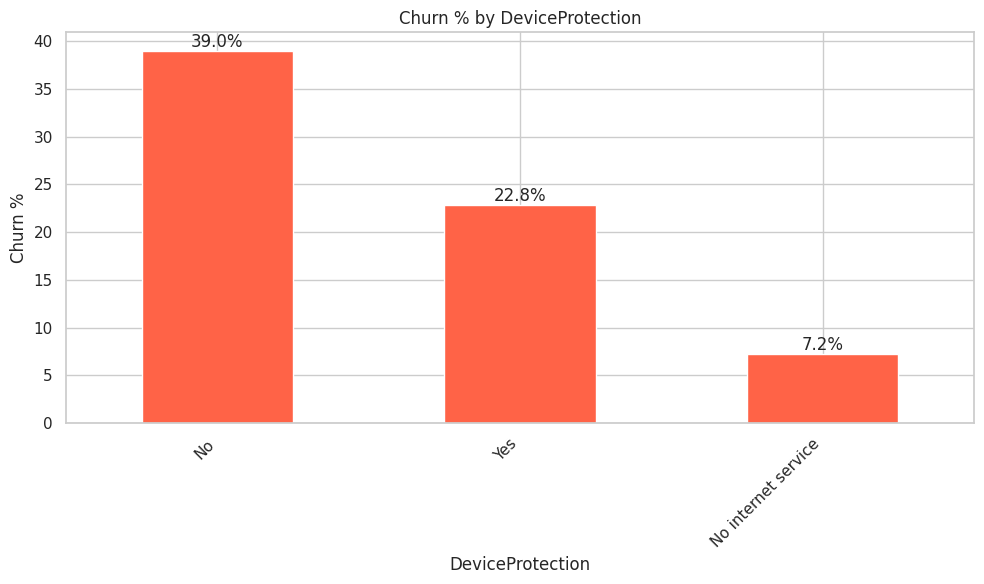

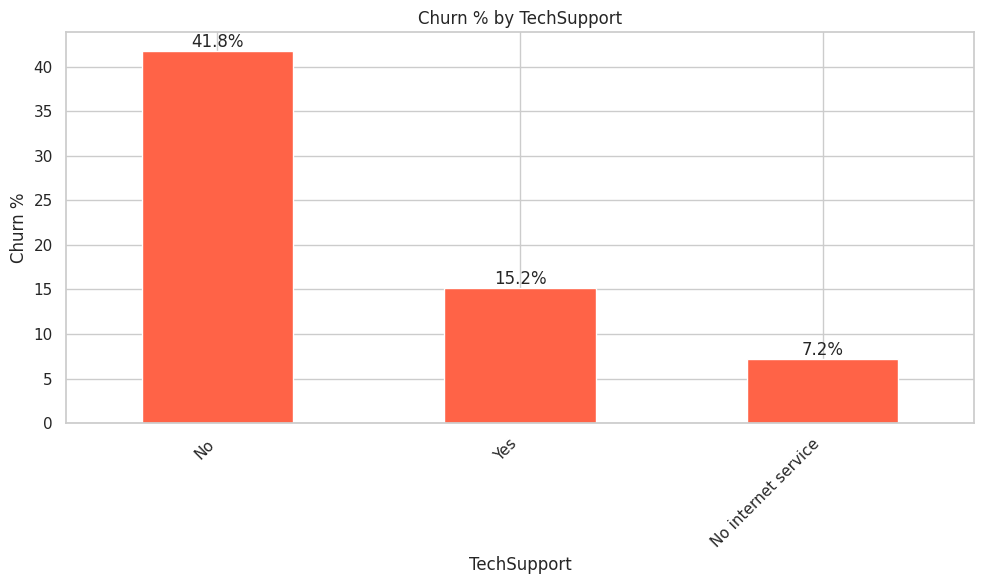

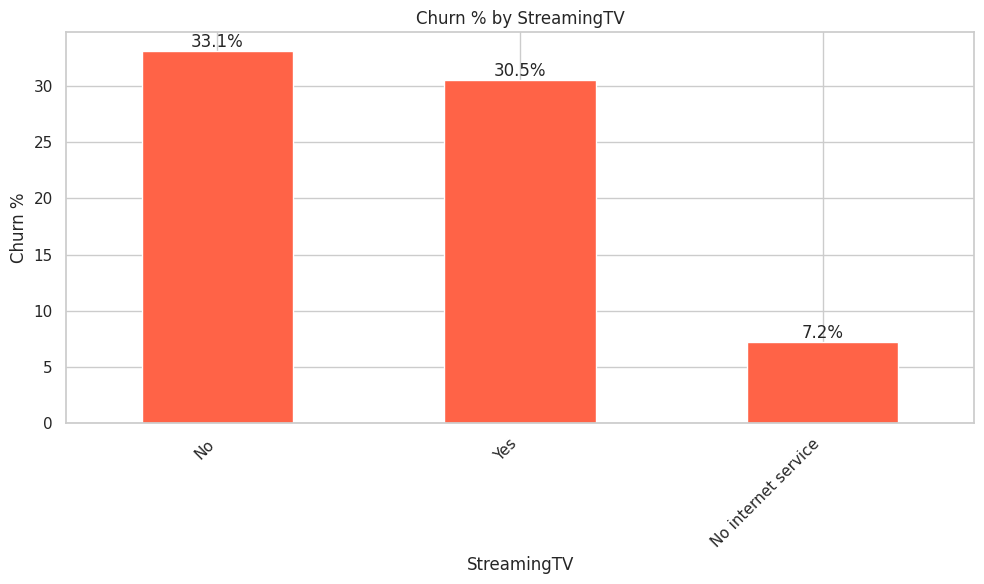

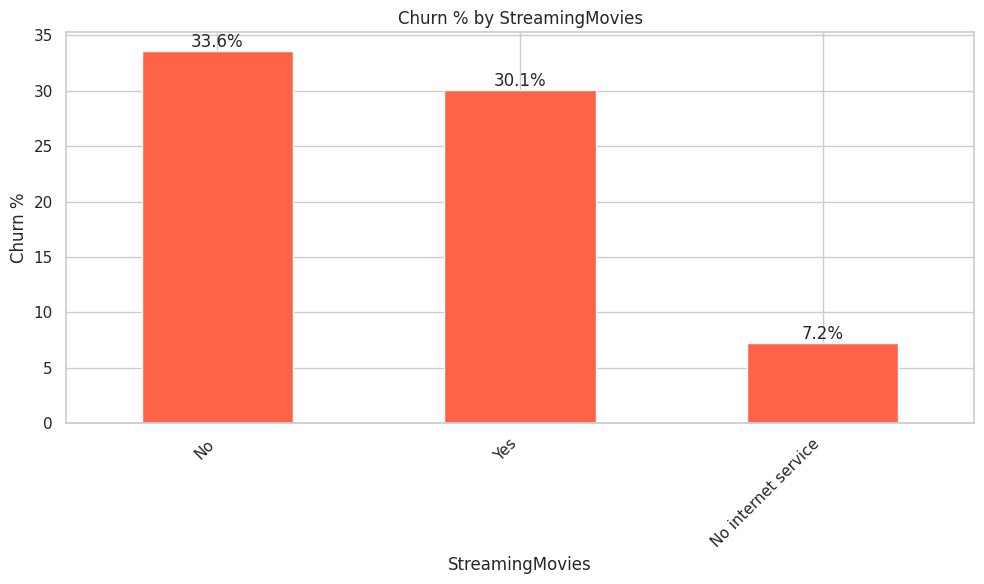

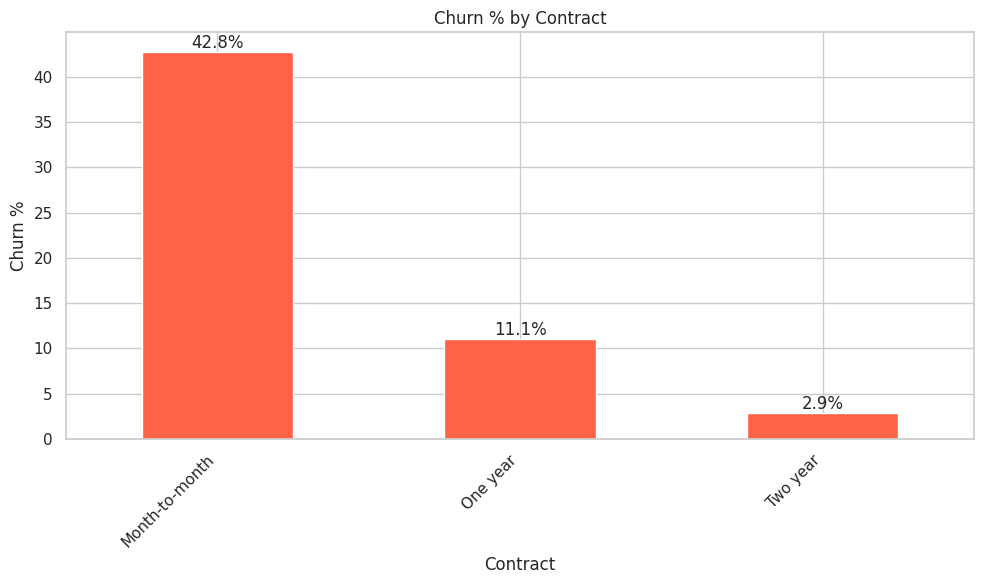

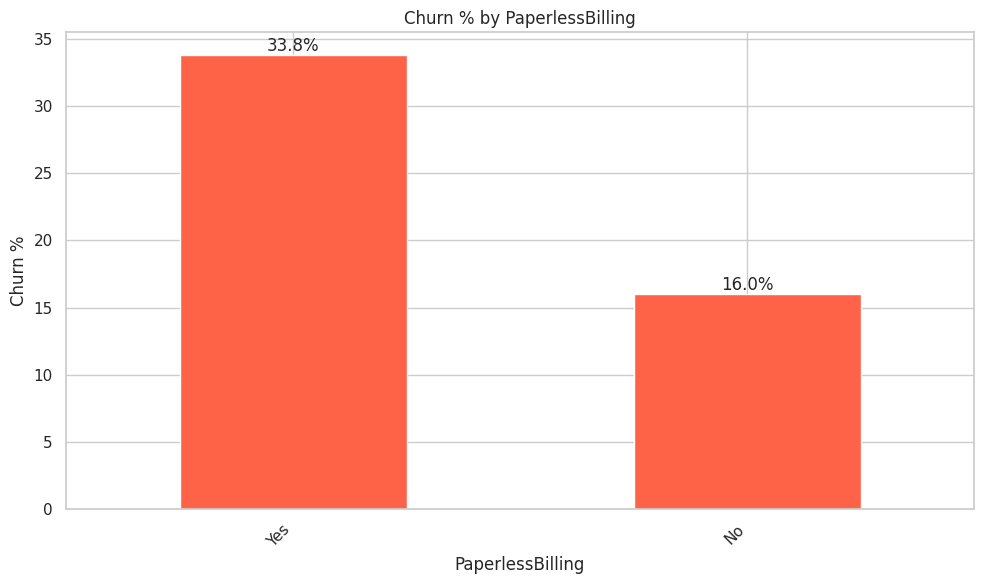

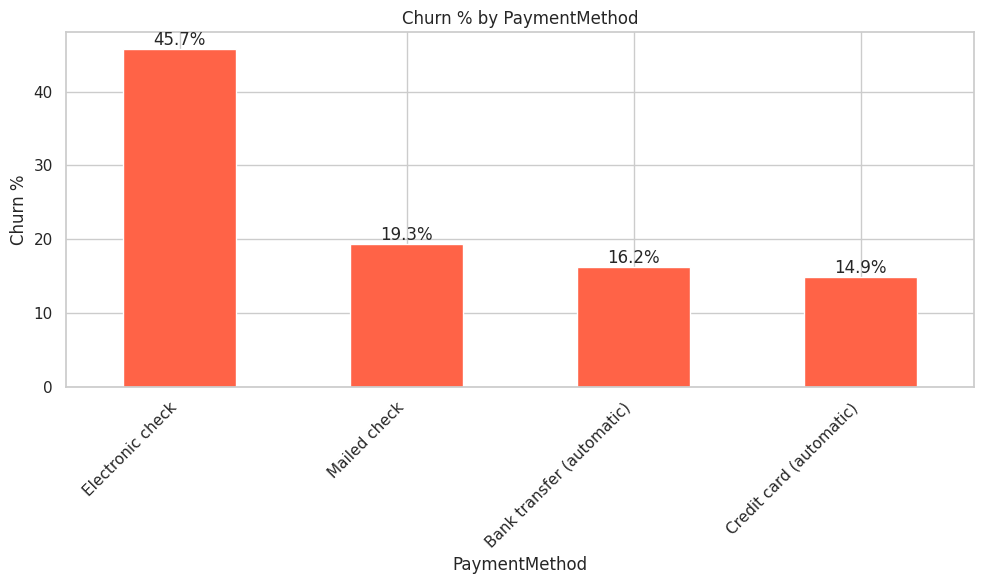

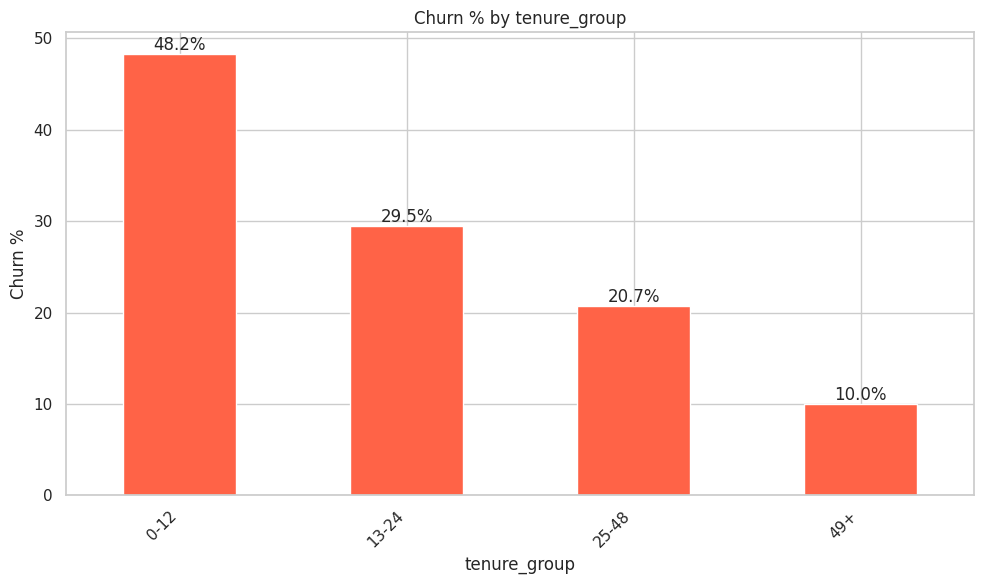

In [13]:
for col in cat_cols:
    rate_df = churn_rate_by_category(col)
    fig, ax = plt.subplots()
    rate_df["Churn %"].sort_values(ascending=False).plot(kind="bar", ax=ax, color="tomato")
    ax.set_ylabel("Churn %")
    ax.set_title(f"Churn % by {col}")
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.1f}%", (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha="center", va="bottom")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.savefig(FIG_DIR / f"churn_rate_{col}.png")
    plt.show()

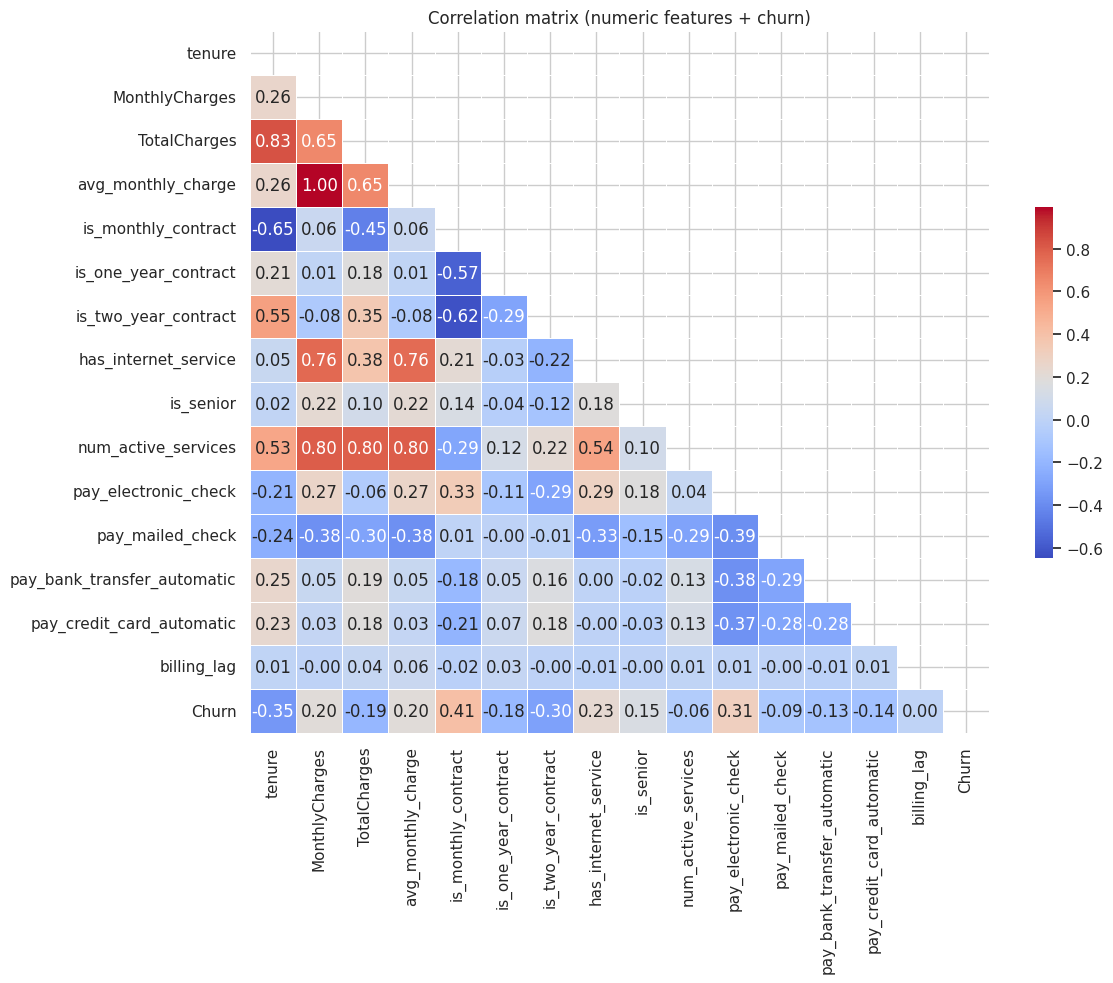

In [14]:
corr = df[num_cols + ["Churn"]].corr()
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(
    corr,
    mask=mask,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
)
plt.title("Correlation matrix (numeric features + churn)")
plt.tight_layout()
plt.savefig(FIG_DIR / "corr_heatmap.png")
plt.show()

In [15]:
SNAPSHOT_PATH = Path("reports") / "processed_snapshot.parquet"
df.to_parquet(SNAPSHOT_PATH, index=False)
print(f"Snapshot of the final dataframe saved to {SNAPSHOT_PATH}")

Snapshot of the final dataframe saved to reports/processed_snapshot.parquet
